# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.cluster import KMeans
import skfuzzy as fuzz
import warnings
warnings.filterwarnings('ignore')

# 2. Load Dataset

In [2]:
data = pd.read_csv('Input.csv')

In [3]:
data.head()

,Name,FuelClass,Smiles,P,S,T,Q+Qr,P*,S*,T*,...,Br,DD,SCpos,C=O,O,COO,nBP,RON,MON,OS
0,Ethane,Alkanes,CC,2,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,111.0,100.7,10.3
1,Propane,Alkanes,CCC,2,1,0,0,0,0,0,...,0.0,0,0,0,0,0,0,112.5,97.1,15.4
2,n-Butane,Alkanes,CCCC,2,2,0,0,0,0,0,...,0.0,0,0,0,0,0,0,93.6,90.1,3.5
3,n-Pentane,Alkanes,CCCCC,2,3,0,0,0,0,0,...,0.0,0,0,0,0,0,0,61.7,61.9,-0.2
4,n-Hexane,Alkanes,CCCCCC,2,4,0,0,0,0,0,...,0.0,0,0,0,0,0,0,24.8,26.0,-1.2


In [4]:
print("Dataset Shape: ", data.shape)
print("Dataset Columns: ", list(data.columns))

Dataset Shape:  (260, 26)
Dataset Columns:  ['Name', 'FuelClass', 'Smiles', 'P', 'S', 'T', 'Q+Qr', 'P*', 'S*', 'T*', 'Sr', 'Tr', 'OH', 'Bz', 'Opos', 'Dbc', 'Br', 'DD', 'SCpos', 'C=O', 'O', 'COO', 'nBP', 'RON', 'MON', 'OS']


# 3. EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       260 non-null    object 
 1   FuelClass  260 non-null    object 
 2   Smiles     260 non-null    object 
 3   P          260 non-null    int64  
 4   S          260 non-null    int64  
 5   T          260 non-null    int64  
 6   Q+Qr       260 non-null    int64  
 7   P*         260 non-null    int64  
 8   S*         260 non-null    int64  
 9   T*         260 non-null    int64  
 10  Sr         260 non-null    int64  
 11  Tr         260 non-null    int64  
 12  OH         260 non-null    int64  
 13  Bz         260 non-null    int64  
 14  Opos       260 non-null    int64  
 15  Dbc        260 non-null    int64  
 16  Br         260 non-null    float64
 17  DD         260 non-null    int64  
 18  SCpos      260 non-null    int64  
 19  C=O        260 non-null    int64  
 20  O         

In [6]:
data.describe()

,P,S,T,Q+Qr,P*,S*,T*,Sr,Tr,OH,...,Br,DD,SCpos,C=O,O,COO,nBP,RON,MON,OS
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,256.000000,253.000000,249.000000
mean,2.411538,1.188462,0.392308,0.176923,0.165385,0.315385,0.157692,0.842308,0.211538,0.076923,...,0.994231,0.523077,0.403846,0.046154,0.034615,0.057692,0.023077,91.150391,82.843874,8.603614
std,1.231763,1.257818,0.621322,0.392308,0.382475,0.609254,0.414667,1.642268,0.574105,0.266983,...,1.303754,0.858439,1.580035,0.210223,0.183156,0.233610,0.150437,21.709833,18.723479,7.774723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.900000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.325000,75.600000,2.700000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.100000,84.900000,10.800000
75%,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.625000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.300000,95.000000,14.500000
max,6.000000,5.000000,3.000000,2.000000,2.000000,2.000000,2.000000,6.000000,3.000000,1.000000,...,7.000000,4.000000,13.000000,1.000000,1.000000,1.000000,1.000000,120.300000,120.300000,23.600000


In [7]:
data['FuelClass'].unique()

array(['Alkanes', 'Cycloalkanes', 'Alkenes', 'Cycloalkenes', 'Aromatics',
       'Alcohols', 'Ketones', 'Esters', 'Other_oxygenates'], dtype=object)

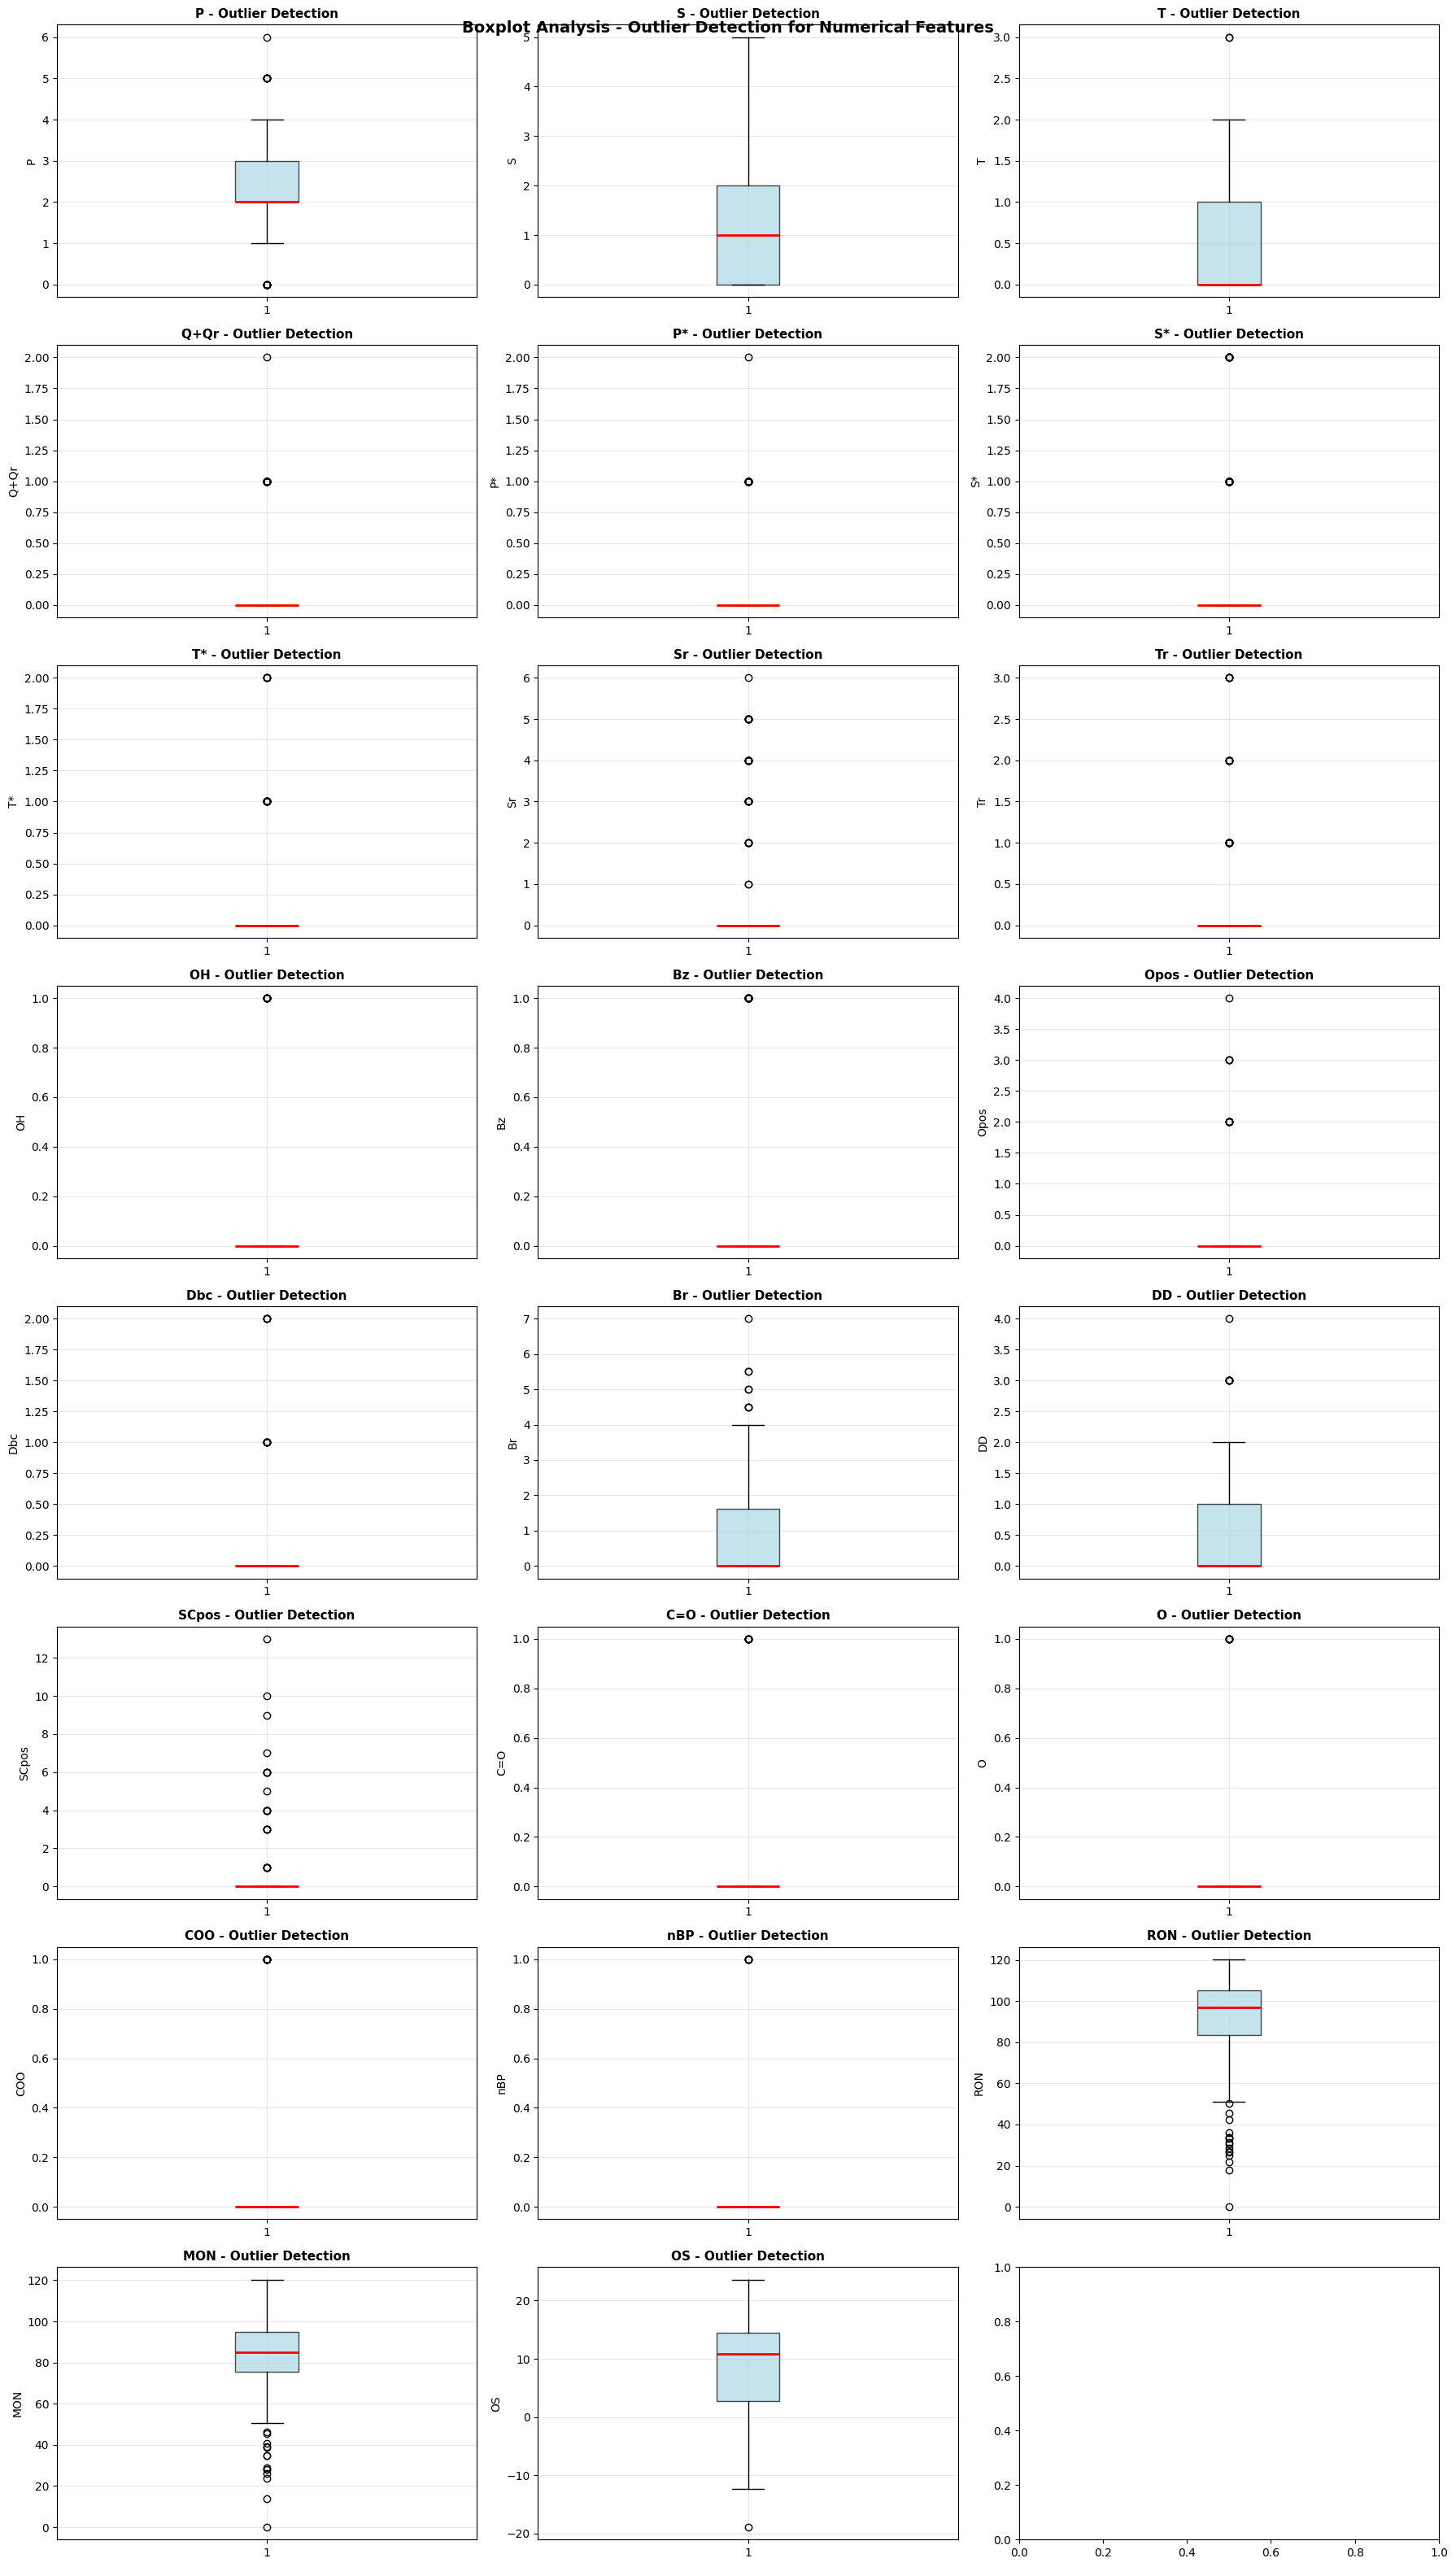

In [8]:
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

n_cols = len(num_cols)
n_rows = (n_cols + 2) // 3  
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    axes[idx].boxplot(data[col].dropna(), vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].set_title(f'{col} - Outlier Detection', fontsize=11, fontweight='bold')
    axes[idx].grid(alpha=0.3)


plt.suptitle('Boxplot Analysis - Outlier Detection for Numerical Features', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

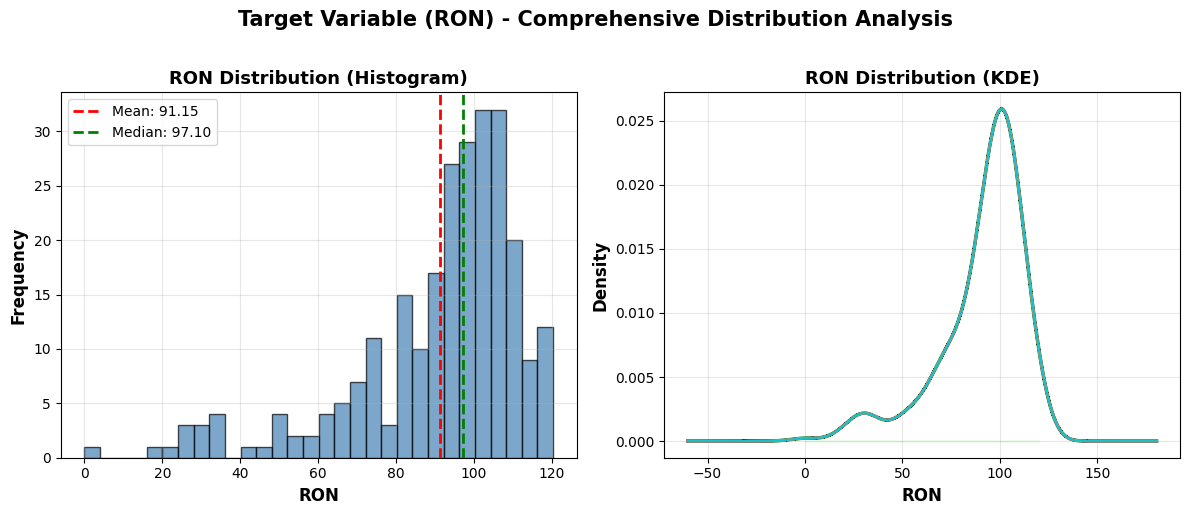

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
axes[0].hist(data['RON'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('RON', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('RON Distribution (Histogram)', fontsize=13, fontweight='bold')
axes[0].axvline(data['RON'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data["RON"].mean():.2f}')
axes[0].axvline(data['RON'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data["RON"].median():.2f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# KDE Plot
data['RON'].plot(kind='kde', ax=axes[1], color='darkgreen', linewidth=2.5)
axes[1].fill_between(data['RON'].sort_values(), 0, 
                     data['RON'].sort_values().apply(lambda x: data['RON'].plot(kind='kde').get_lines()[0].get_ydata()[0] if len(data['RON']) > 0 else 0),
                     alpha=0.3, color='lightgreen')
axes[1].set_xlabel('RON', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Density', fontsize=12, fontweight='bold')
axes[1].set_title('RON Distribution (KDE)', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.suptitle('Target Variable (RON) - Comprehensive Distribution Analysis', 
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


# 4. Preprocessing Data

In [10]:
data.isna().sum()

Name          0
FuelClass     0
Smiles        0
P             0
S             0
T             0
Q+Qr          0
P*            0
S*            0
T*            0
Sr            0
Tr            0
OH            0
Bz            0
Opos          0
Dbc           0
Br            0
DD            0
SCpos         0
C=O           0
O             0
COO           0
nBP           0
RON           4
MON           7
OS           11
dtype: int64

In [11]:
# Remove non-predictive columns
data = data.drop(columns=['Name', 'Smiles'])

In [12]:
# Encode categorical features
le = LabelEncoder()
data['FuelClass'] = le.fit_transform(data['FuelClass'])

In [13]:
# Separate features and target
X = data.drop(columns=['RON'])
y = data['RON']

y = y.fillna(y.median())

In [14]:
# Create preprocessing pipeline
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Numerical pipeline: impute with median
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Create column transformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, num_cols)
], remainder='passthrough')

# Fit and transform
X_processed = preprocessor.fit_transform(X)
X_processed = pd.DataFrame(X_processed, columns=num_cols)

print(f"Final X shape: {X_processed.shape}")

Final X shape: (260, 23)


## Train-Test Split

In [15]:
# Train-Test Split (80-20) - Use X_processed (already imputed)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# Further split training into train-validation (80-20 of training)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"Training set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTotal: {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]} samples")

Training set:   166 samples (63.8%)
Validation set: 42 samples (16.2%)
Test set:       52 samples (20.0%)

Total: 260 samples


In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_processed.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_processed.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_processed.columns, index=X_test.index)

print(f"Training set scaled: {X_train_scaled.shape}")
print(f"Validation set scaled: {X_val_scaled.shape}")
print(f"Test set scaled: {X_test_scaled.shape}")

Training set scaled: (166, 23)
Validation set scaled: (42, 23)
Test set scaled: (52, 23)


In [17]:

X_train_scaled.head(10)

,FuelClass,P,S,T,Q+Qr,P*,S*,T*,Sr,Tr,...,Dbc,Br,DD,SCpos,C=O,O,COO,nBP,MON,OS
234,0.875,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.666667,0.000000,...,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.743142,0.690625
20,0.125,0.833333,0.0,0.333333,0.5,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.428571,0.000000,0.0,0.0,0.0,0.0,0.0,0.842062,0.656250
244,0.750,0.500000,0.2,0.333333,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.142857,0.000000,0.0,0.0,0.0,1.0,1.0,0.910224,0.343750
184,0.375,0.333333,0.4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.801330,0.618750
71,0.500,0.333333,0.0,0.333333,0.0,0.0,0.0,0.0,0.833333,0.333333,...,0.0,0.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.507897,0.371875
99,0.250,0.333333,0.2,0.333333,0.0,0.5,0.5,0.0,0.000000,0.000000,...,0.0,0.214286,0.333333,0.0,0.0,0.0,0.0,0.0,0.674979,0.781250
194,0.375,0.666667,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.852037,0.656250
82,0.250,0.166667,0.0,0.000000,0.0,0.5,0.5,0.0,0.000000,0.000000,...,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.705736,0.831250
93,0.250,0.333333,0.8,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.469659,0.312500
116,0.250,0.500000,0.2,0.333333,0.0,0.0,1.0,0.0,0.000000,0.000000,...,0.0,0.142857,1.000000,0.0,0.0,0.0,0.0,0.0,0.681629,0.815625


## Mutual Information

In [18]:
TOP_K = 10

mi_scores = mutual_info_regression(X_train_scaled, y_train, random_state=42)

mi_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

selected_features = mi_df.head(TOP_K)['Feature'].tolist()

In [19]:
# Filter datasets
X_train_sel = X_train_scaled[selected_features]
X_val_sel = X_val_scaled[selected_features]
X_test_sel = X_test_scaled[selected_features]

print("FEATURE SELECTION (Mutual Information)\n")
print(f"Total features: {len(X_train_scaled.columns)}")
print(f"Selected features: {TOP_K}")
print(f"\nTop {TOP_K} features:")
for idx, row in mi_df.head(TOP_K).iterrows():
    print(f"  {idx+1}. {row['Feature']}: {row['MI_Score']:.4f}")


FEATURE SELECTION (Mutual Information)

Total features: 23
Selected features: 10

Top 10 features:
  22. MON: 1.0301
  1. FuelClass: 0.4514
  3. S: 0.2633
  23. OS: 0.2152
  9. Sr: 0.1828
  12. Bz: 0.1205
  10. Tr: 0.1142
  14. Dbc: 0.0585
  15. Br: 0.0477
  11. OH: 0.0455


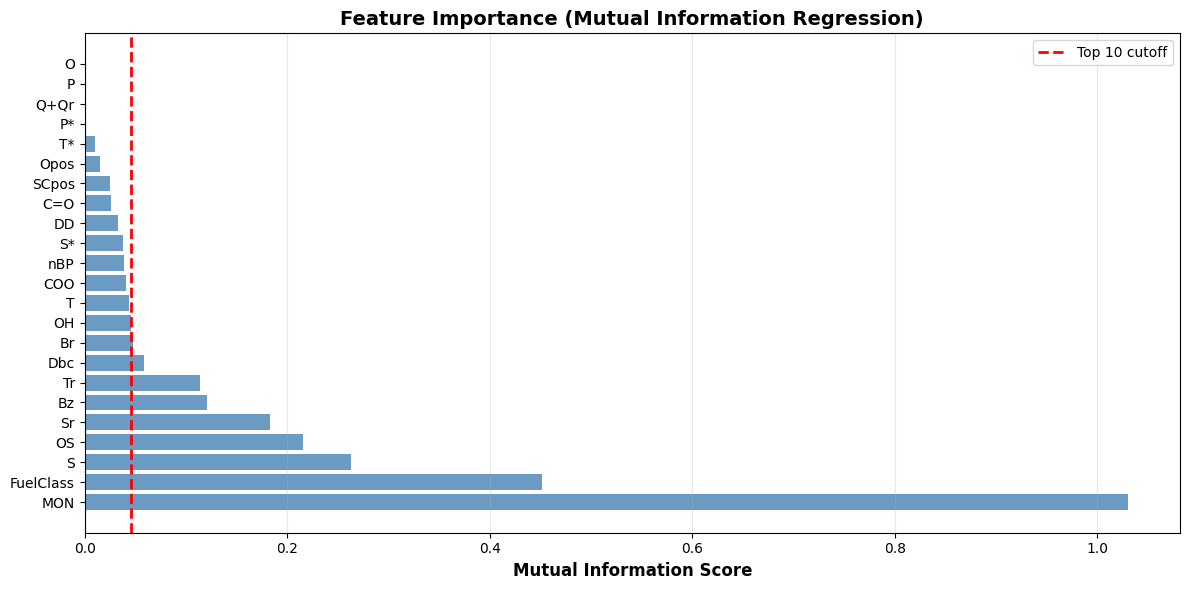

In [20]:
# Visualize Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(range(len(mi_df)), mi_df['MI_Score'], color='steelblue', alpha=0.8)
plt.yticks(range(len(mi_df)), mi_df['Feature'], fontsize=10)
plt.xlabel('Mutual Information Score', fontsize=12, fontweight='bold')
plt.title('Feature Importance (Mutual Information Regression)', fontsize=14, fontweight='bold')
plt.axvline(x=mi_df.iloc[TOP_K-1]['MI_Score'], color='red', linestyle='--', 
            linewidth=2, label=f'Top {TOP_K} cutoff')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Sugeno Fuzzy Inference System (FIS) Implementation

In [21]:
class SugenoFIS:
    def __init__(self, n_rules=5, n_features=10):
        self.n_rules = n_rules
        self.n_features = n_features
        self.premise_params = None
        self.consequent_params = None
        
    def initialize_params_clustering(self, X_train, y_train):
        X = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
        
        kmeans = KMeans(n_clusters=self.n_rules, random_state=42, n_init=10)
        kmeans.fit(X)
        
        centers = kmeans.cluster_centers_
        sigmas = np.zeros_like(centers)
        
        for i in range(self.n_rules):
            distances = np.linalg.norm(X - centers[i], axis=1)
            sigmas[i] = np.maximum(np.std(distances) * np.ones(self.n_features), 0.1)
        
        self.premise_params = np.stack([centers, sigmas], axis=2)
        self.consequent_params = np.zeros((self.n_rules, self.n_features + 1))
        
        for i in range(self.n_rules):
            labels = kmeans.labels_
            mask = (labels == i)
            
            if mask.sum() > 0:
                X_cluster = X[mask]
                y_cluster = y_train.values[mask] if isinstance(y_train, pd.Series) else y_train[mask]
                X_bias = np.column_stack([X_cluster, np.ones(len(X_cluster))])
                
                try:
                    weights = np.linalg.lstsq(X_bias, y_cluster, rcond=None)[0]
                    self.consequent_params[i] = weights
                except:
                    self.consequent_params[i] = np.random.randn(self.n_features + 1) * 0.1
        
        print(f"FIS initialized: {self.n_rules} rules")
        print(f"Premise params: {self.premise_params.shape}")
        print(f"Consequent params: {self.consequent_params.shape}")
    
    def gaussian_mf(self, x, center, sigma):
        return np.exp(-0.5 * ((x - center) / (sigma + 1e-10))**2)
    
    def predict(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else X
        n_samples = X.shape[0]
        predictions = np.zeros(n_samples)
        
        for i in range(n_samples):
            x_sample = X[i]
            firing_strengths = np.zeros(self.n_rules)
            
            for r in range(self.n_rules):
                rule_strength = 1.0
                for f in range(self.n_features):
                    center = self.premise_params[r, f, 0]
                    sigma = self.premise_params[r, f, 1]
                    mu = self.gaussian_mf(x_sample[f], center, sigma)
                    rule_strength *= mu
                firing_strengths[r] = rule_strength
            
            rule_outputs = np.zeros(self.n_rules)
            for r in range(self.n_rules):
                rule_outputs[r] = np.dot(self.consequent_params[r, :-1], x_sample) + \
                                 self.consequent_params[r, -1]
            
            total_strength = firing_strengths.sum() + 1e-10
            predictions[i] = np.dot(firing_strengths, rule_outputs) / total_strength
        
        return predictions
    
    def set_params_from_vector(self, param_vector):
        n_premise = self.n_rules * self.n_features * 2
        n_consequent = self.n_rules * (self.n_features + 1)
        
        premise_flat = param_vector[:n_premise]
        premise_reshaped = premise_flat.reshape(self.n_rules, self.n_features, 2)
        premise_reshaped[:, :, 1] = np.abs(premise_reshaped[:, :, 1]) + 0.01
        self.premise_params = premise_reshaped
        
        consequent_flat = param_vector[n_premise:n_premise + n_consequent]
        self.consequent_params = consequent_flat.reshape(self.n_rules, self.n_features + 1)
    
    def get_params_as_vector(self):
        premise_flat = self.premise_params.flatten()
        consequent_flat = self.consequent_params.flatten()
        return np.concatenate([premise_flat, consequent_flat])
    
    @property
    def means(self):
        return self.premise_params[:, :, 0]
    
    @property
    def sigmas(self):
        return self.premise_params[:, :, 1]
    
    @property
    def consequents(self):
        return self.consequent_params
    
    def get_param_bounds(self):
        n_premise = self.n_rules * self.n_features * 2
        n_consequent = self.n_rules * (self.n_features + 1)
        
        lower_premise = np.zeros(n_premise)
        upper_premise = np.ones(n_premise)
        
        for i in range(1, n_premise, 2):
            lower_premise[i] = 0.01
        
        lower_consequent = np.ones(n_consequent) * -10
        upper_consequent = np.ones(n_consequent) * 10
        
        lower_bounds = np.concatenate([lower_premise, lower_consequent])
        upper_bounds = np.concatenate([upper_premise, upper_consequent])
        
        return lower_bounds, upper_bounds

In [22]:
# Test FIS initialization
N_RULES = 5
fis = SugenoFIS(n_rules=N_RULES, n_features=TOP_K)
fis.initialize_params_clustering(X_train_sel, y_train)

# Test prediction
y_pred_init = fis.predict(X_val_sel)
rmse_init = np.sqrt(mean_squared_error(y_val, y_pred_init))
r2_init = r2_score(y_val, y_pred_init)

print(f"\nInitial FIS Performance (before optimization):")
print(f"  Validation RMSE: {rmse_init:.4f}")
print(f"  Validation R²: {r2_init:.4f}")

# Get parameter vector info
param_vector = fis.get_params_as_vector()
lower_bounds, upper_bounds = fis.get_param_bounds()

print(f"\nParameter vector length: {len(param_vector)}")
print(f"  Premise params: {N_RULES * TOP_K * 2}")
print(f"  Consequent params: {N_RULES * (TOP_K + 1)}")
print(f"  Total: {len(param_vector)}")

FIS initialized: 5 rules
Premise params: (5, 10, 2)
Consequent params: (5, 11)

Initial FIS Performance (before optimization):
  Validation RMSE: 9.9585
  Validation R²: 0.8398

Parameter vector length: 155
  Premise params: 100
  Consequent params: 55
  Total: 155


  File "c:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                      

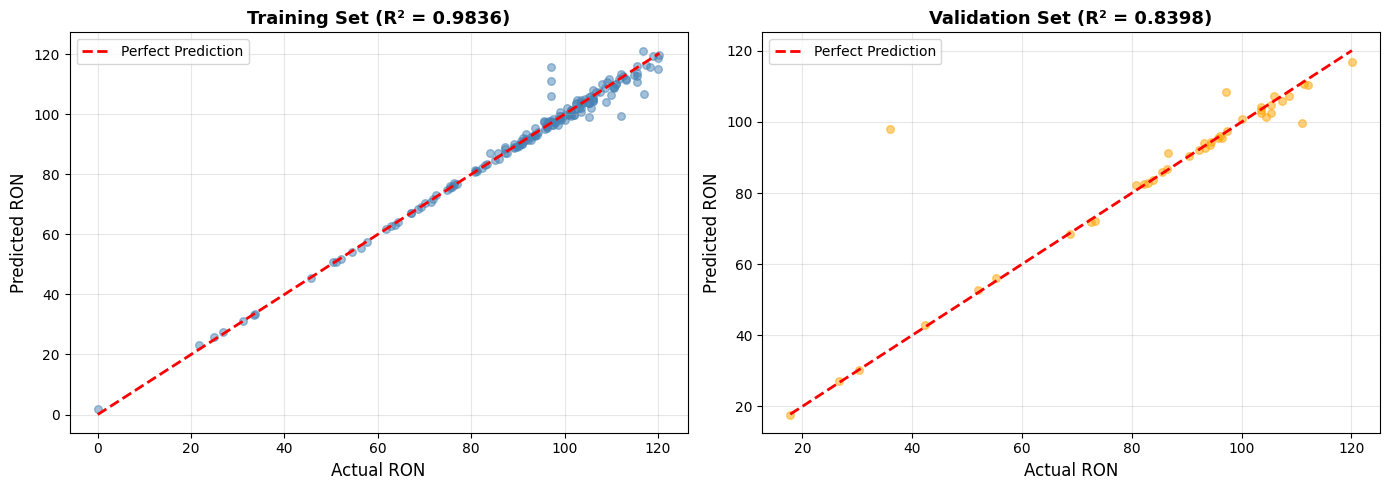

In [23]:
y_train_pred = fis.predict(X_train_sel)
train_r2 = r2_score(y_train, y_train_pred)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=30, color='steelblue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual RON', fontsize=12)
axes[0].set_ylabel('Predicted RON', fontsize=12)
axes[0].set_title(f'Training Set (R² = {train_r2:.4f})', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].scatter(y_val, y_pred_init, alpha=0.5, s=30, color='orange')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual RON', fontsize=12)
axes[1].set_ylabel('Predicted RON', fontsize=12)
axes[1].set_title(f'Validation Set (R² = {r2_init:.4f})', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Initial FIS Rules (Before Optimization)

In [24]:
def display_fis_rules(fis, selected_features, top_k=10):
    """
    Display the fuzzy rules from a Sugeno FIS
    
    Parameters:
    -----------
    fis : SugenoFIS
        The trained FIS model
    selected_features : list
        List of selected feature names
    top_k : int
        Number of top rules to display (based on consequent weights)
    """
    print("=" * 80)
    print("FUZZY INFERENCE SYSTEM - RULES")
    print("=" * 80)
    print(f"\nNumber of Rules: {fis.n_rules}")
    print(f"Number of Features: {fis.n_features}")
    print(f"Selected Features: {', '.join(selected_features)}")
    print("\n" + "=" * 80)
    
    # Calculate rule importance based on consequent weight magnitude
    rule_importance = []
    for i in range(fis.n_rules):
        consequent_weight = np.abs(fis.consequents[i, 0])  # Using first consequent parameter
        rule_importance.append((i, consequent_weight))
    
    # Sort by importance
    rule_importance.sort(key=lambda x: x[1], reverse=True)
    
    print(f"\nTop {min(top_k, fis.n_rules)} Most Important Rules:")
    print("=" * 80)
    
    for rank, (rule_idx, weight) in enumerate(rule_importance[:top_k], 1):
        print(f"\nRule {rule_idx + 1} (Importance: {weight:.4f}):")
        print("-" * 80)
        
        # Display antecedents (IF part)
        print("IF:")
        for feat_idx in range(fis.n_features):
            mean = fis.means[rule_idx, feat_idx]
            sigma = fis.sigmas[rule_idx, feat_idx]
            feat_name = selected_features[feat_idx]
            print(f"  {feat_name} is FUZZY_SET_{rule_idx}_{feat_idx} (μ={mean:.4f}, σ={sigma:.4f})")
        
        # Display consequent (THEN part)
        print("\nTHEN:")
        consequent_params = fis.consequents[rule_idx]
        
        # Linear combination: output = c0 + c1*x1 + c2*x2 + ... + cn*xn
        output_formula = f"  RON = {consequent_params[0]:.4f}"
        for feat_idx in range(fis.n_features):
            coef = consequent_params[feat_idx + 1]
            feat_name = selected_features[feat_idx]
            sign = "+" if coef >= 0 else ""
            output_formula += f" {sign}{coef:.4f}*{feat_name}"
        
        print(output_formula)
        print("-" * 80)
    
    # Display all rules summary
    print(f"\n\nAll Rules Summary:")
    print("=" * 80)
    print(f"{'Rule':<8} {'Weight':<12} {'Mean Centers':<40} {'Consequent[0]':<15}")
    print("-" * 80)
    
    for i in range(fis.n_rules):
        mean_str = "[" + ", ".join([f"{m:.2f}" for m in fis.means[i, :3]]) + "...]"
        print(f"{i+1:<8} {rule_importance[i][1]:<12.4f} {mean_str:<40} {fis.consequents[i, 0]:<15.4f}")
    
    print("=" * 80)

In [25]:
# Display initial FIS rules (K-means clustering initialization)
display_fis_rules(fis, selected_features, top_k=5)

FUZZY INFERENCE SYSTEM - RULES

Number of Rules: 5
Number of Features: 10
Selected Features: MON, FuelClass, S, OS, Sr, Bz, Tr, Dbc, Br, OH


Top 5 Most Important Rules:

Rule 5 (Importance: 121.8406):
--------------------------------------------------------------------------------
IF:
  MON is FUZZY_SET_4_0 (μ=0.8277, σ=0.3872)
  FuelClass is FUZZY_SET_4_1 (μ=0.4010, σ=0.3872)
  S is FUZZY_SET_4_2 (μ=0.1333, σ=0.3872)
  OS is FUZZY_SET_4_3 (μ=0.6277, σ=0.3872)
  Sr is FUZZY_SET_4_4 (μ=-0.0000, σ=0.3872)
  Bz is FUZZY_SET_4_5 (μ=1.0000, σ=0.3872)
  Tr is FUZZY_SET_4_6 (μ=-0.0000, σ=0.3872)
  Dbc is FUZZY_SET_4_7 (μ=-0.0000, σ=0.3872)
  Br is FUZZY_SET_4_8 (μ=0.0595, σ=0.3872)
  OH is FUZZY_SET_4_9 (μ=0.0000, σ=0.3872)

THEN:
  RON = 121.8406 +4.0806*MON +3.7409*FuelClass +27.6281*S -0.0000*OS -6.2471*Sr +0.0000*Bz +0.0000*Tr +8.5207*Dbc +0.0000*Br -6.2471*OH
--------------------------------------------------------------------------------

Rule 4 (Importance: 120.3000):
----------------


VISUALISASI 6 FITUR (GRID 2x3)


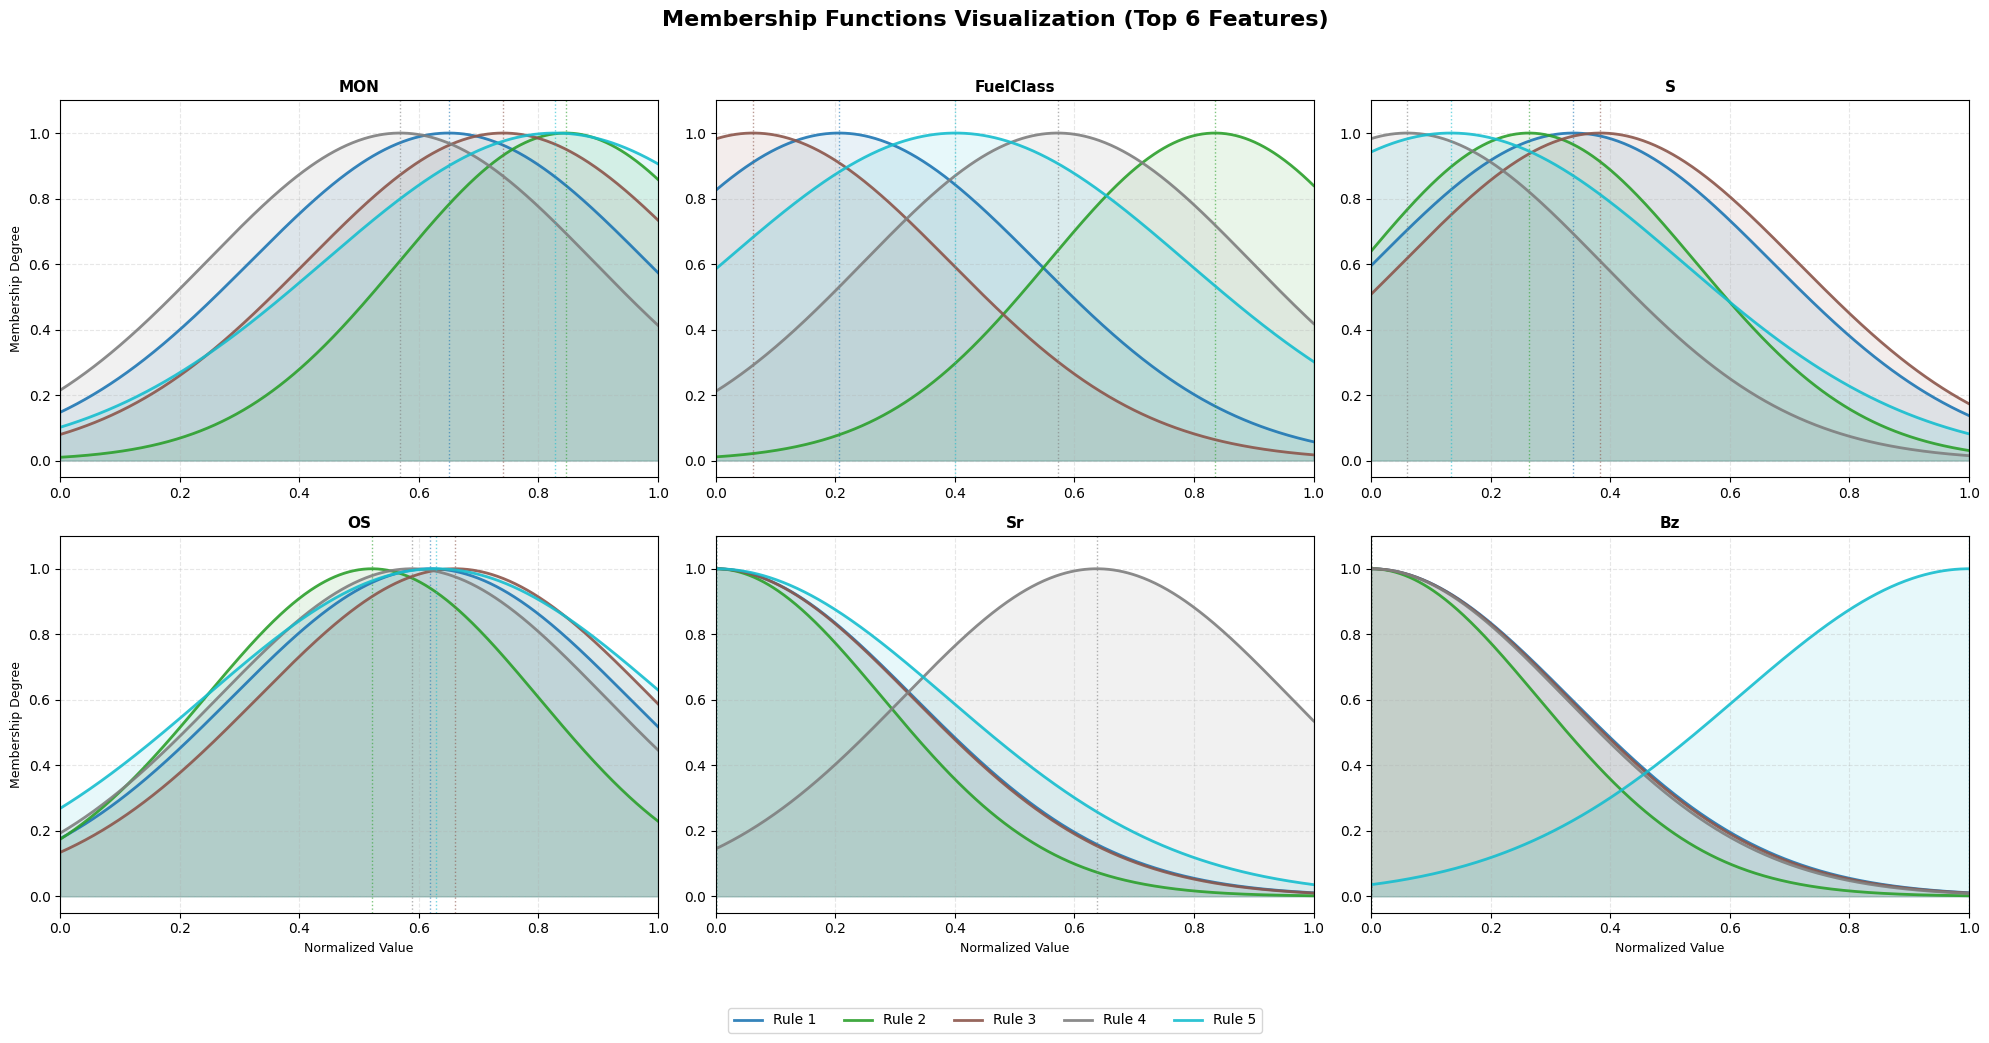

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_membership_functions(fis, selected_features, max_features=6):
    """
    Visualize Gaussian membership functions dalam grid 2x3
    """
    # Pastikan kita tidak meminta plot lebih dari fitur yang tersedia
    n_features_to_plot = min(max_features, fis.n_features, len(selected_features))
    
    # Setup Grid 2 baris x 3 kolom
    rows = 2
    cols = 3
    
    # figsize (Width, Height) dibuat lebar agar tidak gepeng/terpotong
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    
    # Ratakan array axes dari 2D [[ax1,ax2,ax3],[ax4,ax5,ax6]] menjadi 1D [ax1...ax6]
    # agar mudah di-looping
    axes_flat = axes.flatten()
    
    # Warna untuk setiap rule
    colors = plt.cm.tab10(np.linspace(0, 1, fis.n_rules))
    
    # Loop untuk 6 slot plot (sesuai ukuran grid)
    for i in range(rows * cols):
        ax = axes_flat[i]
        
        # Cek apakah index saat ini masih dalam jangkauan fitur yang mau diplot
        if i < n_features_to_plot:
            feat_name = selected_features[i]
            
            # Domain x (Normalized 0-1)
            x = np.linspace(0, 1, 500)
            
            # Plot setiap rule pada fitur ini
            for rule_idx in range(fis.n_rules):
                mean = fis.means[rule_idx, i]
                sigma = fis.sigmas[rule_idx, i]
                
                # Gaussian Formula
                y = np.exp(-0.5 * ((x - mean) / sigma)**2)
                
                # Plot kurva
                ax.plot(x, y, linewidth=2, color=colors[rule_idx], 
                       label=f'Rule {rule_idx+1}' if i == 0 else "", # Legend cuma di plot pertama biar ga penuh (opsional)
                       alpha=0.9)
                
                # Fill area bawah kurva (opsional, biar cantik)
                ax.fill_between(x, y, color=colors[rule_idx], alpha=0.1)
                
                # Garis tengah (mean)
                ax.axvline(mean, color=colors[rule_idx], linestyle=':', 
                          linewidth=1, alpha=0.6)
            
            # Kosmetik Plot
            ax.set_title(f'{feat_name}', fontsize=11, fontweight='bold')
            ax.set_ylim(-0.05, 1.1)
            ax.set_xlim(0, 1)
            ax.grid(True, alpha=0.3, linestyle='--')
            
            # Label Sumbu (Hanya di pinggir agar tidak penuh)
            if i >= 3: # Baris bawah
                ax.set_xlabel('Normalized Value', fontsize=9)
            if i % 3 == 0: # Kolom kiri
                ax.set_ylabel('Membership Degree', fontsize=9)
                
            # Legend kecil di pojok kanan atas tiap plot
            # ax.legend(fontsize=7, loc='upper right') 
            
        else:
            # Jika slot grid lebih banyak dari jumlah fitur, sembunyikan plot kosong
            ax.axis('off')

    # Legend global (Opsional, jika ingin satu legend untuk semua)
    # Gunakan legend dari plot pertama
    lines, labels = axes_flat[0].get_legend_handles_labels()
    fig.legend(lines, [f'Rule {r+1}' for r in range(fis.n_rules)], 
               loc='lower center', ncol=fis.n_rules, bbox_to_anchor=(0.5, -0.05))

    plt.suptitle(f'Membership Functions Visualization (Top {n_features_to_plot} Features)', 
                fontsize=16, fontweight='bold', y=0.98)
    
    # PENTING: rect parameter memberi ruang agar suptitle tidak terpotong
    plt.tight_layout(rect=[0, 0.02, 1, 0.96])
    plt.show()

# Cara Pemanggilan:
print("\n" + "="*80)
print("VISUALISASI 6 FITUR (GRID 2x3)")
print("="*80)
# Pastikan selected_features minimal ada 6 item, atau dia akan plot seadanya lalu sisanya kosong
visualize_membership_functions(fis, selected_features, max_features=6)

# Particle Swarm Optimization (PSO)

In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

N_PARTICLES = 100
MAX_ITER = 50
C1 = 0.5
C2 = 0.5
w= 0.7

def objective_function(param_vector):
    if param_vector.ndim > 1:
        n_particles = param_vector.shape[0]
        errors = np.zeros(n_particles)

        for i in range(n_particles):
            fis_model.set_params_from_vector(param_vector[i])

            y_pred = fis_model.predict(X_train_sel)
            errors[i] = mean_squared_error(y_train, y_pred)

        return errors
    else:
        fis_model.set_params_from_vector(param_vector)
        y_pred = fis_model.predict(X_train_sel)
        return mean_squared_error(y_train, y_pred)

def pso_optimize(fis_model):
    lower_bounds, upper_bounds = fis_model.get_param_bounds()
    DIMENSION = len(lower_bounds)
    kmeans_position=fis_model.get_params_as_vector()
    kmeans_score=objective_function(kmeans_position)

    #inisialisasi partikel
    positions = np.random.uniform(low=lower_bounds, high=upper_bounds,
                                  size=(N_PARTICLES, DIMENSION))

    #mengubah partikel pertama dengan partikel yang sudah di lakukan fis
    positions[0]=kmeans_position.copy()

    #inisialisasi kecepatan. kecepatan awal dibuat 0 semua
    velocities = np.zeros(shape=(N_PARTICLES, DIMENSION))

    #inisialisasi pbest
    pbest_positions = positions.copy()
    pbest_scores = objective_function(positions)

    #inisialisasi gbest
    gbest_index = np.argmin(pbest_scores)
    gbest_position = pbest_positions[gbest_index].copy()
    gbest_score = pbest_scores[gbest_index]
    print(f"Initial GBest MSE: {gbest_score:.4f}")

    convergence = []

    for iteration in range(MAX_ITER):
        r1 = np.random.rand(N_PARTICLES, DIMENSION)
        r2 = np.random.rand(N_PARTICLES, DIMENSION)


        v_inertia = w * velocities

        v_cognitive = C1 * r1 * (pbest_positions - positions)

        gbest_matrix = np.tile(gbest_position, (N_PARTICLES, 1))
        v_social = C2 * r2 * (gbest_matrix - positions)

        #kecepatan baru
        velocities = v_inertia + v_cognitive + v_social

        #posisi baru
        positions = positions + velocities

        positions = np.clip(positions, lower_bounds, upper_bounds)

        current_scores = objective_function(positions)

        #ngeupdate pbest
        improved_pbest = current_scores < pbest_scores
        pbest_scores[improved_pbest] = current_scores[improved_pbest]
        pbest_positions[improved_pbest] = positions[improved_pbest]

        #update gbest
        min_current_score = np.min(current_scores)
        if min_current_score < gbest_score:
            gbest_score = min_current_score
            gbest_index = np.argmin(current_scores)
            gbest_position = positions[gbest_index].copy()

        convergence.append(gbest_score)

        #liat nilai mse tiap iterasi modulus 10
        if (iteration + 1) % 10 == 0:
            print(f"Iteration {iteration + 1}/{MAX_ITER} - GBest MSE: {gbest_score:.6f}")

    print(f"\nFinal GBest MSE: {gbest_score:.6f}")
    fis_model.set_params_from_vector(gbest_position)

    return gbest_position, gbest_score, convergence

#pemanggilan
fis_model = SugenoFIS(n_rules=5, n_features=10)
fis_model.initialize_params_clustering(X_train_sel, y_train)

final_params, final_mse, pso_convergence_history = pso_optimize(fis_model)

#model yang sudah dioptimasi
y_val_pred = fis_model.predict(X_val_sel)
rmse_PSO= np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_PSO =r2_score(y_val, y_val_pred)

print("Final Validation RMSE:", rmse_PSO)
print('Final Validation R2:',r2_PSO)

# Store PSO best parameters
pso_best_params = final_params.copy()

FIS initialized: 5 rules
Premise params: (5, 10, 2)
Consequent params: (5, 11)
Initial GBest MSE: 7.5297
Initial GBest MSE: 7.5297
Iteration 10/50 - GBest MSE: 7.529704
Iteration 10/50 - GBest MSE: 7.529704
Iteration 20/50 - GBest MSE: 7.529704
Iteration 20/50 - GBest MSE: 7.529704
Iteration 30/50 - GBest MSE: 7.529704
Iteration 30/50 - GBest MSE: 7.529704
Iteration 40/50 - GBest MSE: 7.529704
Iteration 40/50 - GBest MSE: 7.529704
Iteration 50/50 - GBest MSE: 7.529704

Final GBest MSE: 7.529704
Final Validation RMSE: 9.950254065766327
Final Validation R2: 0.8400845397617196
Iteration 50/50 - GBest MSE: 7.529704

Final GBest MSE: 7.529704
Final Validation RMSE: 9.950254065766327
Final Validation R2: 0.8400845397617196


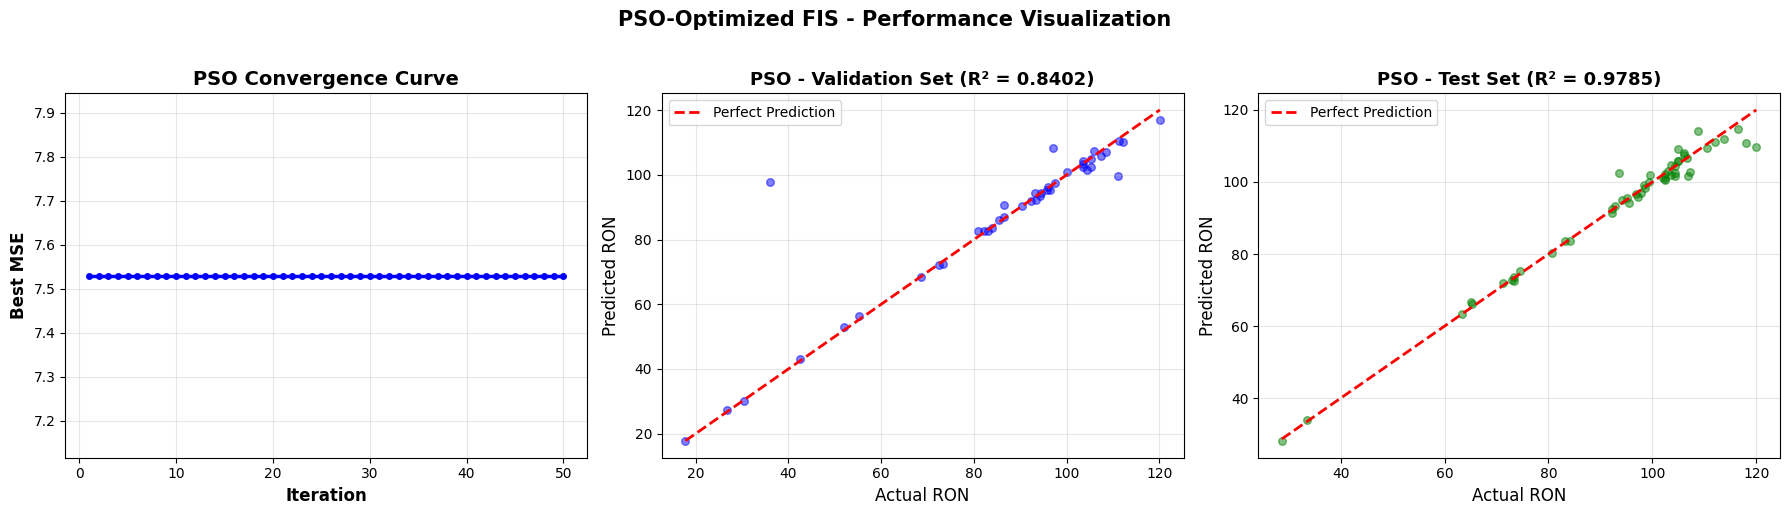


PSO PERFORMANCE METRICS
Training R²:   0.9829
Validation R²: 0.8402
Test R²:       0.9785


In [28]:
# PSO Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Convergence plot
axes[0].plot(range(1, len(pso_convergence_history) + 1), pso_convergence_history, 
             linewidth=2.5, color='blue', marker='o', markersize=4)
axes[0].set_xlabel('Iteration', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Best MSE', fontsize=12, fontweight='bold')
axes[0].set_title('PSO Convergence Curve', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Prediction vs Actual for Validation
fis_pso = SugenoFIS(n_rules=N_RULES, n_features=TOP_K)
fis_pso.set_params_from_vector(pso_best_params)

y_train_pred_pso = fis_pso.predict(X_train_sel)
y_val_pred_pso = fis_pso.predict(X_val_sel)
y_test_pred_pso = fis_pso.predict(X_test_sel)

train_r2_pso = r2_score(y_train, y_train_pred_pso)
val_r2_pso = r2_score(y_val, y_val_pred_pso)
test_r2_pso = r2_score(y_test, y_test_pred_pso)

axes[1].scatter(y_val, y_val_pred_pso, alpha=0.5, s=30, color='blue')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual RON', fontsize=12)
axes[1].set_ylabel('Predicted RON', fontsize=12)
axes[1].set_title(f'PSO - Validation Set (R² = {val_r2_pso:.4f})', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Test set prediction
axes[2].scatter(y_test, y_test_pred_pso, alpha=0.5, s=30, color='green')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[2].set_xlabel('Actual RON', fontsize=12)
axes[2].set_ylabel('Predicted RON', fontsize=12)
axes[2].set_title(f'PSO - Test Set (R² = {test_r2_pso:.4f})', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.suptitle('PSO-Optimized FIS - Performance Visualization', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("PSO PERFORMANCE METRICS")
print("="*60)
print(f"Training R²:   {train_r2_pso:.4f}")
print(f"Validation R²: {val_r2_pso:.4f}")
print(f"Test R²:       {test_r2_pso:.4f}")
print("="*60)

# Genetic Algorithm (GA)

In [29]:
import numpy as np
import copy
from sklearn.metrics import mean_squared_error, r2_score

class RealCodedGA:
    def __init__(self, fis_model, pop_size=50, mutation_rate=0.05, cross_rate=0.7):
        self.fis = fis_model
        self.pop_size = pop_size
        self.mutation_rate = mutation_rate
        self.cross_rate = cross_rate
        self.pop = None
        self.fitness = None
        self.best_individual = None
        self.best_score = -np.inf

    def init_population(self, initial_params):
        # Inisialisasi populasi di sekitar parameter hasil clustering (K-Means)
        # Kita tambahkan noise kecil agar ada variasi genetik
        self.pop = np.tile(initial_params, (self.pop_size, 1))
        noise = np.random.normal(0, 0.1, size=self.pop.shape)
        self.pop += noise
        # Pastikan individu pertama adalah parameter asli (elitism sederhana)
        self.pop[0] = initial_params

    def get_fitness(self, individual, X, y):
        # Decode kromosom ke parameter FIS
        self.fis.set_params_from_vector(individual)
        y_pred = self.fis.predict(X)

        # Hitung RMSE
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        # Fitness harus dimaksimalkan, sedangkan RMSE harus diminimalkan
        # Kita pakai invers RMSE
        return 1.0 / (rmse + 1e-6), rmse

    def select(self):
        # Roulette Wheel Selection
        probs = self.fitness / self.fitness.sum()
        indices = np.random.choice(np.arange(self.pop_size), size=self.pop_size, p=probs)
        return self.pop[indices]

    def crossover(self, parent1, parent2):
        # Arithmetic Crossover untuk nilai float
        if np.random.rand() < self.cross_rate:
            alpha = np.random.rand()
            child1 = alpha * parent1 + (1 - alpha) * parent2
            child2 = (1 - alpha) * parent1 + alpha * parent2
            return child1, child2
        return parent1.copy(), parent2.copy()

    def mutate(self, child):
        # Gaussian Mutation: geser nilai sedikit berdasarkan probabilitas
        mutation_mask = np.random.rand(len(child)) < self.mutation_rate
        noise = np.random.normal(0, 0.1, size=np.sum(mutation_mask))
        child[mutation_mask] += noise
        return child

    def evolve(self, X, y):
        # 1. Evaluasi Fitness
        fitness_values = []
        rmse_values = []

        for i in range(self.pop_size):
            fit, rmse = self.get_fitness(self.pop[i], X, y)
            fitness_values.append(fit)
            rmse_values.append(rmse)

        self.fitness = np.array(fitness_values)

        # Simpan yang terbaik (Elitism)
        max_idx = np.argmax(self.fitness)
        if self.fitness[max_idx] > self.best_score:
            self.best_score = self.fitness[max_idx]
            self.best_individual = self.pop[max_idx].copy()

        # 2. Seleksi
        selected_pop = self.select()

        # 3. Crossover & Mutasi
        new_pop = []
        # Elitism: Masukkan individu terbaik ke generasi berikutnya tanpa diubah
        new_pop.append(self.best_individual)

        for i in range(0, self.pop_size - 1, 2):
            # Pastikan indeks tidak out of bound jika pop_size ganjil
            p1 = selected_pop[i]
            p2 = selected_pop[(i + 1) % len(selected_pop)]

            c1, c2 = self.crossover(p1, p2)

            new_pop.append(self.mutate(c1))
            if len(new_pop) < self.pop_size:
                new_pop.append(self.mutate(c2))

        self.pop = np.array(new_pop)
        return np.min(rmse_values) # Return RMSE terbaik di generasi ini

In [30]:
# --- Konfigurasi GA ---
N_GENERATIONS = 50
POP_SIZE = 30
MUTATION_RATE = 0.1
CROSS_RATE = 0.8

# Ambil parameter awal dari Fuzzy System (hasil clustering KMeans)
initial_params = fis.get_params_as_vector()

# Inisialisasi GA
ga_optimizer = RealCodedGA(fis, pop_size=POP_SIZE, mutation_rate=MUTATION_RATE, cross_rate=CROSS_RATE)
ga_optimizer.init_population(initial_params)

print("Mulai Optimasi Genetika...")
history_rmse = []

# --- Main Loop ---
for gen in range(N_GENERATIONS):
    best_rmse = ga_optimizer.evolve(X_train_sel, y_train)
    history_rmse.append(best_rmse)

    # Print progress tiap 10 generasi agar tidak spam
    if (gen + 1) % 10 == 0 or gen == 0:
        print(f"Gen {gen+1}/{N_GENERATIONS} | Best RMSE: {best_rmse:.4f}")

# Set parameter terbaik ke model FIS
fis.set_params_from_vector(ga_optimizer.best_individual)

# Store GA best parameters
ga_best_params = ga_optimizer.best_individual.copy()
ga_convergence_history = history_rmse.copy()

Mulai Optimasi Genetika...
Gen 1/50 | Best RMSE: 2.7251
Gen 1/50 | Best RMSE: 2.7251
Gen 10/50 | Best RMSE: 2.6761
Gen 10/50 | Best RMSE: 2.6761
Gen 20/50 | Best RMSE: 2.6595
Gen 20/50 | Best RMSE: 2.6595
Gen 30/50 | Best RMSE: 2.6754
Gen 30/50 | Best RMSE: 2.6754
Gen 40/50 | Best RMSE: 2.6754
Gen 40/50 | Best RMSE: 2.6754
Gen 50/50 | Best RMSE: 2.6754
Gen 50/50 | Best RMSE: 2.6754


------------------------------
HASIL AKHIR SETELAH GA
------------------------------
Training RMSE : 2.6754
Training R2   : 0.9840
------------------------------
Validation RMSE : 9.9000
Validation R2   : 0.8417


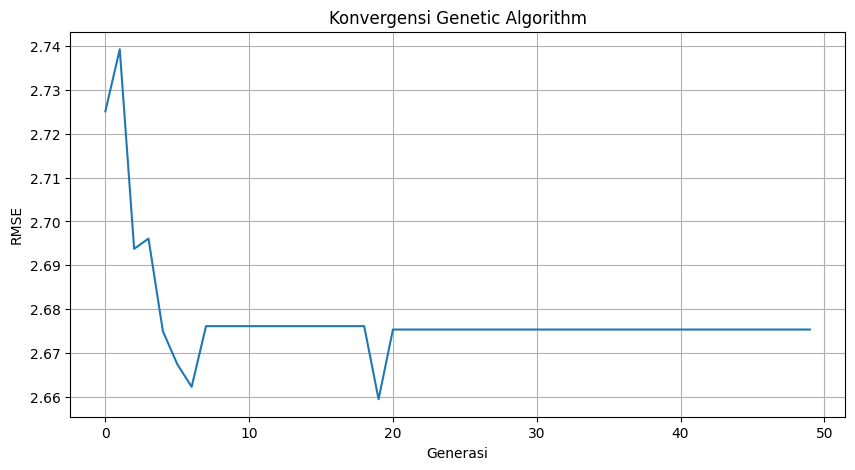

In [31]:
# Prediksi menggunakan parameter hasil optimasi GA
y_pred_ga_train = fis.predict(X_train_sel)
y_pred_ga_val = fis.predict(X_val_sel)

# Hitung Metrik
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_ga_train))
r2_train = r2_score(y_train, y_pred_ga_train)

rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_ga_val))
r2_val = r2_score(y_val, y_pred_ga_val)

print("-" * 30)
print("HASIL AKHIR SETELAH GA")
print("-" * 30)
print(f"Training RMSE : {rmse_train:.4f}")
print(f"Training R2   : {r2_train:.4f}")
print("-" * 30)
print(f"Validation RMSE : {rmse_val:.4f}")
print(f"Validation R2   : {r2_val:.4f}")

# Visualisasi konvergensi (opsional, biar laporan bagus)
plt.figure(figsize=(10, 5))
plt.plot(history_rmse)
plt.title('Konvergensi Genetic Algorithm')
plt.xlabel('Generasi')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

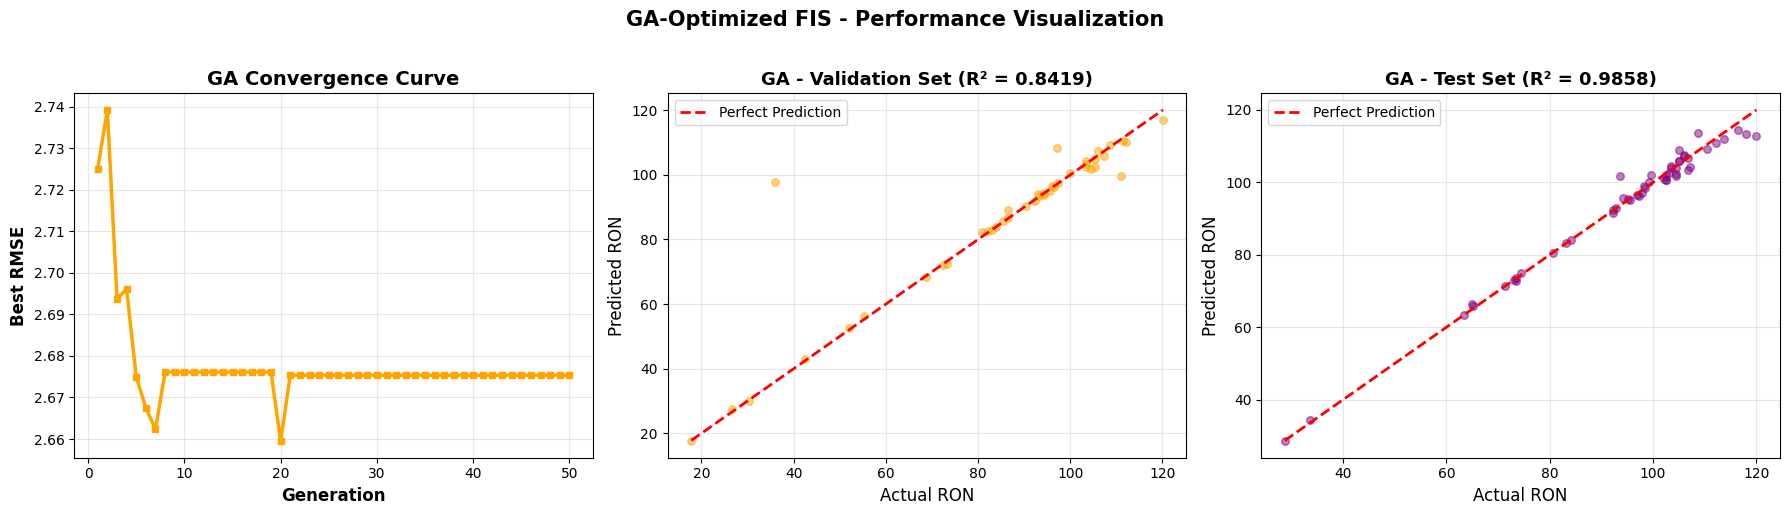


GA PERFORMANCE METRICS
Training R²:   0.9838
Validation R²: 0.8419
Test R²:       0.9858


In [32]:
# GA Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Convergence plot (RMSE)
axes[0].plot(range(1, len(ga_convergence_history) + 1), ga_convergence_history, 
             linewidth=2.5, color='orange', marker='s', markersize=4)
axes[0].set_xlabel('Generation', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Best RMSE', fontsize=12, fontweight='bold')
axes[0].set_title('GA Convergence Curve', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Prediction vs Actual for Validation
fis_ga = SugenoFIS(n_rules=N_RULES, n_features=TOP_K)
fis_ga.set_params_from_vector(ga_best_params)

y_train_pred_ga = fis_ga.predict(X_train_sel)
y_val_pred_ga = fis_ga.predict(X_val_sel)
y_test_pred_ga = fis_ga.predict(X_test_sel)

train_r2_ga = r2_score(y_train, y_train_pred_ga)
val_r2_ga = r2_score(y_val, y_val_pred_ga)
test_r2_ga = r2_score(y_test, y_test_pred_ga)

axes[1].scatter(y_val, y_val_pred_ga, alpha=0.5, s=30, color='orange')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual RON', fontsize=12)
axes[1].set_ylabel('Predicted RON', fontsize=12)
axes[1].set_title(f'GA - Validation Set (R² = {val_r2_ga:.4f})', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Test set prediction
axes[2].scatter(y_test, y_test_pred_ga, alpha=0.5, s=30, color='purple')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[2].set_xlabel('Actual RON', fontsize=12)
axes[2].set_ylabel('Predicted RON', fontsize=12)
axes[2].set_title(f'GA - Test Set (R² = {test_r2_ga:.4f})', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.suptitle('GA-Optimized FIS - Performance Visualization', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("GA PERFORMANCE METRICS")
print("="*60)
print(f"Training R²:   {train_r2_ga:.4f}")
print(f"Validation R²: {val_r2_ga:.4f}")
print(f"Test R²:       {test_r2_ga:.4f}")
print("="*60)

# Grey Wolf Optimization (GWO)

Grey Wolf Optimization mengoptimalkan parameter FIS dengan meniru hierarki sosial dan perilaku berburu serigala abu-abu.

In [33]:
class GreyWolfOptimizer:
    def __init__(self, n_wolves=30, max_iter=100, dim=None, bounds=None, initial_position=None, patience=5):
        self.n_wolves = n_wolves
        self.max_iter = max_iter
        self.dim = dim
        self.lower_bounds = bounds[0]
        self.upper_bounds = bounds[1]
        self.initial_position = initial_position
        self.patience = patience
        
        self.alpha_pos = None
        self.alpha_score = float('inf')
        self.beta_pos = None
        self.beta_score = float('inf')
        self.delta_pos = None
        self.delta_score = float('inf')
        
        self.convergence_curve = []
        self.early_stopped = False
        self.stopped_iteration = None
    
    def initialize_population(self):
        population = np.random.uniform(
            self.lower_bounds, 
            self.upper_bounds, 
            (self.n_wolves, self.dim)
        )
        if self.initial_position is not None:
            population[0] = self.initial_position.copy()
        return population
    
    def optimize(self, objective_func):
        positions = self.initialize_population()
        
        fitnesses = np.array([objective_func(positions[i]) for i in range(self.n_wolves)])
        
        for i in range(self.n_wolves):
            fitness = fitnesses[i]
            
            if fitness < self.alpha_score:
                self.delta_score = self.beta_score
                self.delta_pos = self.beta_pos.copy() if self.beta_pos is not None else None
                self.beta_score = self.alpha_score
                self.beta_pos = self.alpha_pos.copy() if self.alpha_pos is not None else None
                self.alpha_score = fitness
                self.alpha_pos = positions[i].copy()
            elif fitness < self.beta_score:
                self.delta_score = self.beta_score
                self.delta_pos = self.beta_pos.copy() if self.beta_pos is not None else None
                self.beta_score = fitness
                self.beta_pos = positions[i].copy()
            elif fitness < self.delta_score:
                self.delta_score = fitness
                self.delta_pos = positions[i].copy()
        
        print(f"Initial Alpha MSE: {self.alpha_score:.4f}")
        
        # Early stopping variables
        best_score_so_far = self.alpha_score
        no_improvement_count = 0
        
        for iteration in range(self.max_iter):
            for i in range(self.n_wolves):
                fitness = objective_func(positions[i])
                
                if fitness < self.alpha_score:
                    self.delta_score = self.beta_score
                    self.delta_pos = self.beta_pos.copy() if self.beta_pos is not None else None
                    self.beta_score = self.alpha_score
                    self.beta_pos = self.alpha_pos.copy() if self.alpha_pos is not None else None
                    self.alpha_score = fitness
                    self.alpha_pos = positions[i].copy()
                elif fitness < self.beta_score:
                    self.delta_score = self.beta_score
                    self.delta_pos = self.beta_pos.copy() if self.beta_pos is not None else None
                    self.beta_score = fitness
                    self.beta_pos = positions[i].copy()
                elif fitness < self.delta_score:
                    self.delta_score = fitness
                    self.delta_pos = positions[i].copy()
            
            # Early stopping check
            if self.alpha_score < best_score_so_far - 1e-6:
                best_score_so_far = self.alpha_score
                no_improvement_count = 0
            else:
                no_improvement_count += 1
            
            if no_improvement_count >= self.patience:
                self.early_stopped = True
                self.stopped_iteration = iteration + 1
                print(f"\nEarly stopping at iteration {iteration+1}/{self.max_iter}")
                print(f"No improvement for {self.patience} consecutive iterations")
                self.convergence_curve.append(self.alpha_score)
                break
            
            a = 2 - iteration * (2 / self.max_iter)
            
            for i in range(self.n_wolves):
                for j in range(self.dim):
                    r1 = np.random.random()
                    r2 = np.random.random()
                    A1 = 2 * a * r1 - a
                    C1 = 2 * r2
                    D_alpha = abs(C1 * self.alpha_pos[j] - positions[i, j])
                    X1 = self.alpha_pos[j] - A1 * D_alpha
                    
                    r1 = np.random.random()
                    r2 = np.random.random()
                    A2 = 2 * a * r1 - a
                    C2 = 2 * r2
                    D_beta = abs(C2 * self.beta_pos[j] - positions[i, j])
                    X2 = self.beta_pos[j] - A2 * D_beta
                    
                    r1 = np.random.random()
                    r2 = np.random.random()
                    A3 = 2 * a * r1 - a
                    C3 = 2 * r2
                    D_delta = abs(C3 * self.delta_pos[j] - positions[i, j])
                    X3 = self.delta_pos[j] - A3 * D_delta
                    
                    positions[i, j] = (X1 + X2 + X3) / 3
                    
                    positions[i, j] = np.clip(positions[i, j], 
                                             self.lower_bounds[j], 
                                             self.upper_bounds[j])
            
            self.convergence_curve.append(self.alpha_score)
            
            if (iteration + 1) % 10 == 0:
                print(f"Iteration {iteration+1}/{self.max_iter} - Best MSE: {self.alpha_score:.6f}")
        
        if not self.early_stopped:
            print(f"\nCompleted all {self.max_iter} iterations")
        
        print(f"Final Best MSE: {self.alpha_score:.6f}")
        return self.alpha_pos, self.alpha_score, self.convergence_curve                    

In [34]:
def objective_function_gwo(param_vector):
    fis_temp = SugenoFIS(n_rules=N_RULES, n_features=TOP_K)
    fis_temp.set_params_from_vector(param_vector)
    
    y_pred = fis_temp.predict(X_train_sel)
    mse = mean_squared_error(y_train, y_pred)
    
    return mse

print("Objective function for GWO ready (using training set, MSE)")

Objective function for GWO ready (using training set, MSE)


In [35]:
N_RUNS = 50
N_ITERATIONS = 100
POP_SIZE = 50

lower_bounds, upper_bounds = fis.get_param_bounds()
dim = len(fis.get_params_as_vector())
kmeans_position = fis.get_params_as_vector()
kmeans_score = objective_function_gwo(kmeans_position)

print("="*80)
print("GWO EXPERIMENT CONFIGURATION")
print("="*80)
print(f"Number of Runs: {N_RUNS}")
print(f"Population Size: {POP_SIZE} wolves")
print(f"Max Iterations: {N_ITERATIONS}")
print(f"Dimensions: {dim}")
print(f"Problem: Optimize {N_RULES} rules with {TOP_K} features")
print(f"K-means Initial MSE: {kmeans_score:.4f}")
print("="*80)

best_fitness_list = []
convergence_histories = []
best_params_list = []
run_details = []
best_params_overall = None
best_fitness_overall = float('inf')
early_stop_counts = 0

for run in range(N_RUNS):
    print(f"\n[Run {run+1}/{N_RUNS}] Starting...")
    
    gwo = GreyWolfOptimizer(
        n_wolves=POP_SIZE,
        max_iter=N_ITERATIONS,
        dim=dim,
        bounds=(lower_bounds, upper_bounds),
        initial_position=kmeans_position,
        patience=5
    )
    
    best_params, best_fitness, convergence = gwo.optimize(objective_function_gwo)
    
    best_fitness_list.append(best_fitness)
    convergence_histories.append(convergence)
    best_params_list.append(best_params.copy())
    
    if gwo.early_stopped:
        early_stop_counts += 1
    
    # Store run details for comparison
    run_details.append({
        'run': run + 1,
        'mse': best_fitness,
        'params': best_params.copy(),
        'early_stopped': gwo.early_stopped,
        'stopped_iteration': gwo.stopped_iteration
    })
    
    if best_fitness < best_fitness_overall:
        best_fitness_overall = best_fitness
        best_params_overall = best_params.copy()
    
    early_stop_msg = f" (Early stopped at iter {gwo.stopped_iteration})" if gwo.early_stopped else ""
    print(f"[Run {run+1}/{N_RUNS}] Complete - Best MSE: {best_fitness:.6f}{early_stop_msg}")

mean_fitness = np.mean(best_fitness_list)
std_fitness = np.std(best_fitness_list)
min_fitness = np.min(best_fitness_list)
max_fitness = np.max(best_fitness_list)
median_fitness = np.median(best_fitness_list)

print("\n" + "="*80)
print("GWO EXPERIMENT RESULTS SUMMARY")
print("="*80)
print(f"Best MSE (Overall):  {best_fitness_overall:.6f}")
print(f"Mean MSE:            {mean_fitness:.6f}")
print(f"Std MSE:             {std_fitness:.6f}")
print(f"Min MSE:             {min_fitness:.6f}")
print(f"Max MSE:             {max_fitness:.6f}")
print(f"Median MSE:          {median_fitness:.6f}")
print("="*80)

GWO EXPERIMENT CONFIGURATION
Number of Runs: 50
Population Size: 50 wolves
Max Iterations: 100
Dimensions: 155
Problem: Optimize 5 rules with 10 features
K-means Initial MSE: 7.2519

[Run 1/50] Starting...
Initial Alpha MSE: 7.3555
Initial Alpha MSE: 7.3555

Early stopping at iteration 5/100
No improvement for 5 consecutive iterations
Final Best MSE: 7.355545
[Run 1/50] Complete - Best MSE: 7.355545 (Early stopped at iter 5)

[Run 2/50] Starting...

Early stopping at iteration 5/100
No improvement for 5 consecutive iterations
Final Best MSE: 7.355545
[Run 1/50] Complete - Best MSE: 7.355545 (Early stopped at iter 5)

[Run 2/50] Starting...
Initial Alpha MSE: 7.3555
Initial Alpha MSE: 7.3555

Early stopping at iteration 5/100
No improvement for 5 consecutive iterations
Final Best MSE: 7.355545
[Run 2/50] Complete - Best MSE: 7.355545 (Early stopped at iter 5)

[Run 3/50] Starting...

Early stopping at iteration 5/100
No improvement for 5 consecutive iterations
Final Best MSE: 7.355545
[

In [36]:
# Get top 3 runs based on MSE
run_details_sorted = sorted(run_details, key=lambda x: x['mse'])
top_3_runs = run_details_sorted[:3]

print("\n" + "="*80)
print("TOP 3 RUNS COMPARISON")
print("="*80)

# Create comparison table
comparison_data = []

for rank, run_info in enumerate(top_3_runs, 1):
    run_num = run_info['run']
    params = run_info['params']
    
    # Create FIS with these parameters
    fis_temp = SugenoFIS(n_rules=N_RULES, n_features=TOP_K)
    fis_temp.set_params_from_vector(params)
    
    # Evaluate on all sets
    y_train_pred = fis_temp.predict(X_train_sel)
    y_val_pred = fis_temp.predict(X_val_sel)
    y_test_pred = fis_temp.predict(X_test_sel)
    
    # Calculate metrics for each set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    comparison_data.append({
        'Rank': rank,
        'Run': run_num,
        'Train_MSE': train_mse,
        'Train_RMSE': train_rmse,
        'Train_MAE': train_mae,
        'Train_R2': train_r2,
        'Val_MSE': val_mse,
        'Val_RMSE': val_rmse,
        'Val_MAE': val_mae,
        'Val_R2': val_r2,
        'Test_MSE': test_mse,
        'Test_RMSE': test_rmse,
        'Test_MAE': test_mae,
        'Test_R2': test_r2,
        'Early_Stopped': run_info['early_stopped'],
        'Stopped_Iter': run_info['stopped_iteration'] if run_info['early_stopped'] else N_ITERATIONS
    })

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display detailed comparison
print("\nDETAILED METRICS COMPARISON:")
print("="*80)
for idx, row in comparison_df.iterrows():
    print(f"\n{'='*80}")
    print(f"RANK {row['Rank']}: Run #{int(row['Run'])}")
    if row['Early_Stopped']:
        print(f"  Early stopped at iteration {int(row['Stopped_Iter'])}")
    else:
        print(f"  Completed all {int(row['Stopped_Iter'])} iterations")
    print(f"{'='*80}")
    
    print(f"\n{'TRAINING SET':<20} {'VALIDATION SET':<20} {'TEST SET':<20}")
    print(f"{'-'*60}")
    print(f"{'MSE:':<8} {row['Train_MSE']:>11.6f} {row['Val_MSE']:>11.6f} {row['Test_MSE']:>11.6f}")
    print(f"{'RMSE:':<8} {row['Train_RMSE']:>11.4f} {row['Val_RMSE']:>11.4f} {row['Test_RMSE']:>11.4f}")
    print(f"{'MAE:':<8} {row['Train_MAE']:>11.4f} {row['Val_MAE']:>11.4f} {row['Test_MAE']:>11.4f}")
    print(f"{'R²:':<8} {row['Train_R2']:>11.4f} {row['Val_R2']:>11.4f} {row['Test_R2']:>11.4f}")

# Summary table
print("\n\n" + "="*80)
print("SUMMARY TABLE - TOP 3 RUNS")
print("="*80)
print(f"{'Rank':<6} {'Run':<6} {'Train R²':<12} {'Val R²':<12} {'Test R²':<12} {'Test RMSE':<12} {'Test MAE':<12}")
print("-"*80)
for idx, row in comparison_df.iterrows():
    print(f"{int(row['Rank']):<6} {int(row['Run']):<6} {row['Train_R2']:<12.4f} {row['Val_R2']:<12.4f} {row['Test_R2']:<12.4f} {row['Test_RMSE']:<12.4f} {row['Test_MAE']:<12.4f}")
print("="*80)

# Save comparison dataframe for later use
comparison_df_top3 = comparison_df.copy()


TOP 3 RUNS COMPARISON

DETAILED METRICS COMPARISON:

RANK 1: Run #1
  Early stopped at iteration 5

TRAINING SET         VALIDATION SET       TEST SET            
------------------------------------------------------------
MSE:        7.468132   97.667408    5.008283
RMSE:         2.7328      9.8827      2.2379
MAE:          1.3336      2.8347      1.4468
R²:           0.9833      0.8422      0.9857

RANK 2: Run #2
  Early stopped at iteration 5

TRAINING SET         VALIDATION SET       TEST SET            
------------------------------------------------------------
MSE:        7.468132   97.667408    5.008283
RMSE:         2.7328      9.8827      2.2379
MAE:          1.3336      2.8347      1.4468
R²:           0.9833      0.8422      0.9857

RANK 3: Run #3
  Early stopped at iteration 5

TRAINING SET         VALIDATION SET       TEST SET            
------------------------------------------------------------
MSE:        7.468132   97.667408    5.008283
RMSE:         2.7328      

In [37]:
fis_gwo = SugenoFIS(n_rules=N_RULES, n_features=TOP_K)
fis_gwo.set_params_from_vector(best_params_overall)

y_train_pred_gwo = fis_gwo.predict(X_train_sel)
y_val_pred_gwo = fis_gwo.predict(X_val_sel)
y_test_pred_gwo = fis_gwo.predict(X_test_sel)

train_mse_gwo = mean_squared_error(y_train, y_train_pred_gwo)
val_mse_gwo = mean_squared_error(y_val, y_val_pred_gwo)
test_mse_gwo = mean_squared_error(y_test, y_test_pred_gwo)

train_rmse_gwo = np.sqrt(train_mse_gwo)
val_rmse_gwo = np.sqrt(val_mse_gwo)
test_rmse_gwo = np.sqrt(test_mse_gwo)

train_r2_gwo = r2_score(y_train, y_train_pred_gwo)
val_r2_gwo = r2_score(y_val, y_val_pred_gwo)
test_r2_gwo = r2_score(y_test, y_test_pred_gwo)

train_mae_gwo = mean_absolute_error(y_train, y_train_pred_gwo)
val_mae_gwo = mean_absolute_error(y_val, y_val_pred_gwo)
test_mae_gwo = mean_absolute_error(y_test, y_test_pred_gwo)

print("=" * 60)
print("GWO-OPTIMIZED SUGENO FIS - PERFORMANCE EVALUATION")
print("=" * 60)
print(f"\nTraining Set:")
print(f"  MSE:  {train_mse_gwo:.6f}")
print(f"  RMSE: {train_rmse_gwo:.4f}")
print(f"  MAE:  {train_mae_gwo:.4f}")
print(f"  R²:   {train_r2_gwo:.4f}")

print(f"\nValidation Set:")
print(f"  MSE:  {val_mse_gwo:.6f}")
print(f"  RMSE: {val_rmse_gwo:.4f}")
print(f"  MAE:  {val_mae_gwo:.4f}")
print(f"  R²:   {val_r2_gwo:.4f}")

print(f"\nTest Set:")
print(f"  MSE:  {test_mse_gwo:.6f}")
print(f"  RMSE: {test_rmse_gwo:.4f}")
print(f"  MAE:  {test_mae_gwo:.4f}")
print(f"  R²:   {test_r2_gwo:.4f}")
print("=" * 60)

GWO-OPTIMIZED SUGENO FIS - PERFORMANCE EVALUATION

Training Set:
  MSE:  7.468132
  RMSE: 2.7328
  MAE:  1.3336
  R²:   0.9833

Validation Set:
  MSE:  97.667408
  RMSE: 9.8827
  MAE:  2.8347
  R²:   0.8422

Test Set:
  MSE:  5.008283
  RMSE: 2.2379
  MAE:  1.4468
  R²:   0.9857


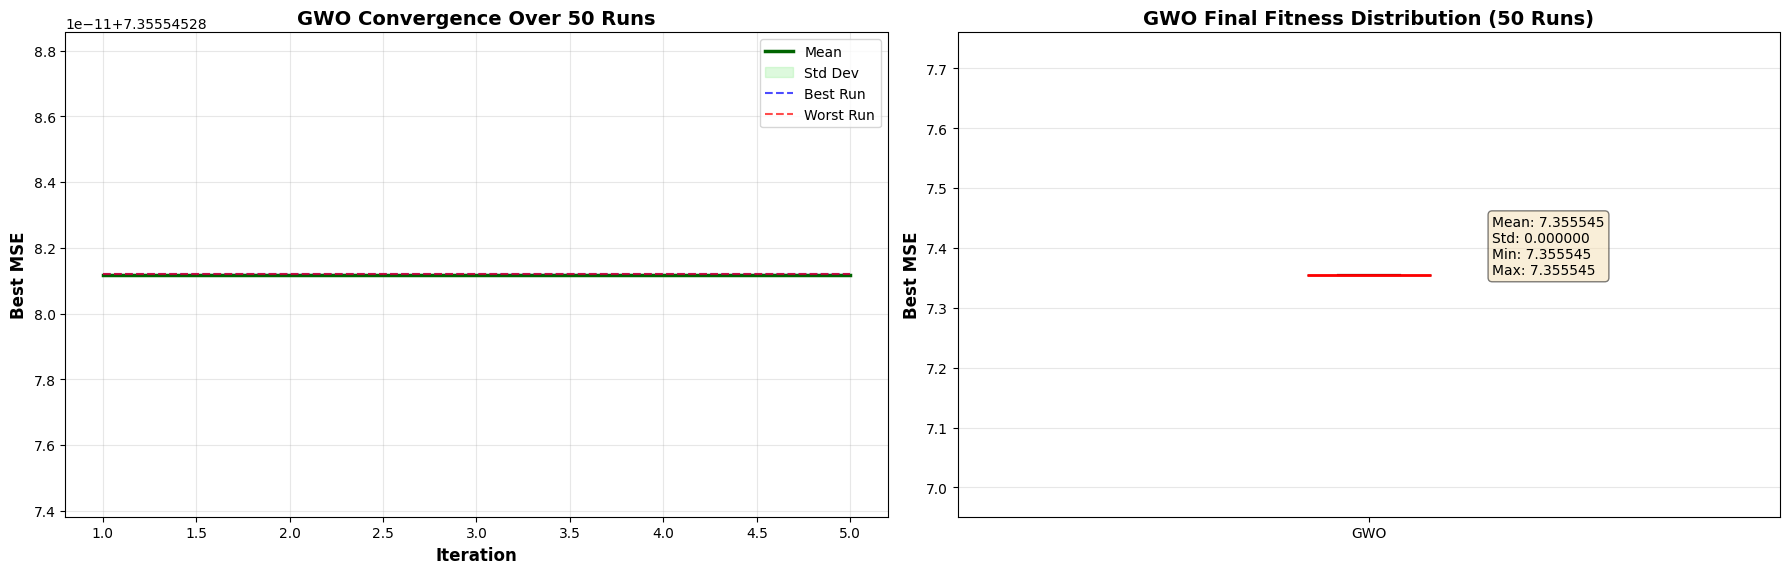

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Handle different length convergence histories due to early stopping
# Pad shorter arrays with their last value
max_length = max(len(conv) for conv in convergence_histories)
padded_convergences = []
for conv in convergence_histories:
    if len(conv) < max_length:
        # Pad with last value
        padded = np.pad(conv, (0, max_length - len(conv)), mode='edge')
    else:
        padded = np.array(conv)
    padded_convergences.append(padded)

convergence_array = np.array(padded_convergences)
mean_convergence = np.mean(convergence_array, axis=0)
std_convergence = np.std(convergence_array, axis=0)
min_convergence = np.min(convergence_array, axis=0)
max_convergence = np.max(convergence_array, axis=0)

iterations = np.arange(1, max_length + 1)

axes[0].plot(iterations, mean_convergence, linewidth=2.5, color='darkgreen', label='Mean')
axes[0].fill_between(iterations, 
                      mean_convergence - std_convergence, 
                      mean_convergence + std_convergence, 
                      alpha=0.3, color='lightgreen', label='Std Dev')
axes[0].plot(iterations, min_convergence, linewidth=1.5, linestyle='--', 
             color='blue', label='Best Run', alpha=0.7)
axes[0].plot(iterations, max_convergence, linewidth=1.5, linestyle='--', 
             color='red', label='Worst Run', alpha=0.7)
axes[0].set_xlabel('Iteration', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Best MSE', fontsize=12, fontweight='bold')
axes[0].set_title(f'GWO Convergence Over {N_RUNS} Runs', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(best_fitness_list, vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Best MSE', fontsize=12, fontweight='bold')
axes[1].set_title(f'GWO Final Fitness Distribution ({N_RUNS} Runs)', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['GWO'])
axes[1].grid(True, alpha=0.3, axis='y')

stats_text = f"Mean: {mean_fitness:.6f}\nStd: {std_fitness:.6f}\nMin: {min_fitness:.6f}\nMax: {max_fitness:.6f}"
axes[1].text(1.15, max_fitness, stats_text, fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

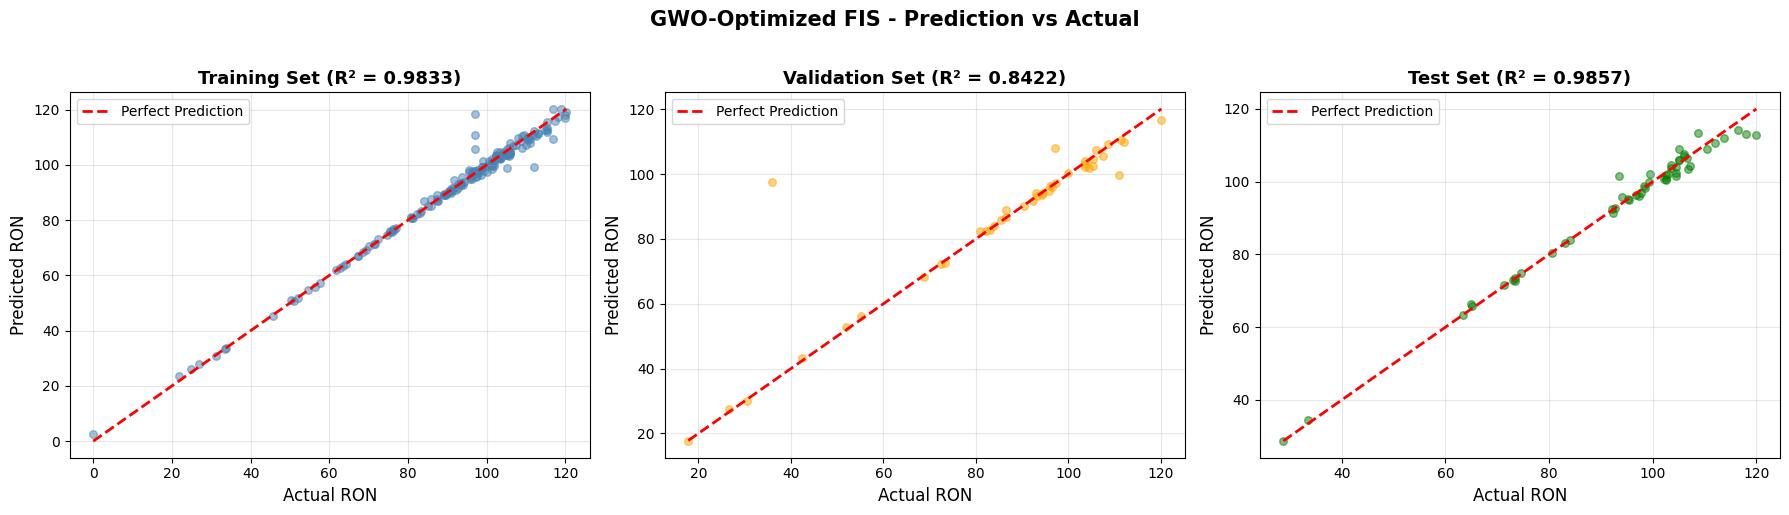

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(y_train, y_train_pred_gwo, alpha=0.5, s=30, color='steelblue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual RON', fontsize=12)
axes[0].set_ylabel('Predicted RON', fontsize=12)
axes[0].set_title(f'Training Set (R² = {train_r2_gwo:.4f})', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].scatter(y_val, y_val_pred_gwo, alpha=0.5, s=30, color='orange')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual RON', fontsize=12)
axes[1].set_ylabel('Predicted RON', fontsize=12)
axes[1].set_title(f'Validation Set (R² = {val_r2_gwo:.4f})', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].scatter(y_test, y_test_pred_gwo, alpha=0.5, s=30, color='green')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[2].set_xlabel('Actual RON', fontsize=12)
axes[2].set_ylabel('Predicted RON', fontsize=12)
axes[2].set_title(f'Test Set (R² = {test_r2_gwo:.4f})', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.suptitle('GWO-Optimized FIS - Prediction vs Actual', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Comparison Test: PSO vs GA vs GWO on 5 New Samples

In [40]:
# Select 5 random samples from validation set for comparison
np.random.seed(42)
sample_indices = np.random.choice(X_val_sel.index, size=5, replace=False)

X_samples = X_val_sel.loc[sample_indices]
y_samples = y_val.loc[sample_indices]

print("="*80)
print("TEST SAMPLES - INPUT FEATURES (Top 10 Features)")
print("="*80)
print("\nSelected Features:", selected_features)
print("\n")

for idx, (sample_idx, row) in enumerate(X_samples.iterrows(), 1):
    print(f"Sample {idx} (Index: {sample_idx}):")
    print("-"*80)
    for feat_name in selected_features:
        print(f"  {feat_name:.<30} {row[feat_name]:.6f}")
    print(f"  {'Actual RON':.<30} {y_samples.loc[sample_idx]:.4f}")
    print()

print("="*80)

TEST SAMPLES - INPUT FEATURES (Top 10 Features)

Selected Features: ['MON', 'FuelClass', 'S', 'OS', 'Sr', 'Bz', 'Tr', 'Dbc', 'Br', 'OH']


Sample 1 (Index: 141):
--------------------------------------------------------------------------------
  MON........................... 0.727348
  FuelClass..................... 0.250000
  S............................. 0.000000
  OS............................ 0.818750
  Sr............................ 0.000000
  Bz............................ 0.000000
  Tr............................ 0.000000
  Dbc........................... 0.000000
  Br............................ 0.285714
  OH............................ 0.000000
  Actual RON.................... 103.5000

Sample 2 (Index: 255):
--------------------------------------------------------------------------------
  MON........................... 0.761430
  FuelClass..................... 1.000000
  S............................. 0.000000
  OS............................ 0.850000
  Sr..................

In [54]:
import time
import tracemalloc

# Select 5 samples for testing
np.random.seed(42)
sample_indices = np.random.choice(X_val_sel.index, size=5, replace=False)
X_samples = X_val_sel.loc[sample_indices]
y_samples = y_val.loc[sample_indices]

print("="*100)
print("FINAL COMPARISON: FUZZY (BASELINE) vs PSO vs GA vs GWO")
print("="*100)
print("\nSelected 5 Test Samples:")
for idx, (sample_idx, actual) in enumerate(zip(sample_indices, y_samples), 1):
    print(f"  Sample {idx}: Index={sample_idx}, Actual RON={actual:.4f}")

# 1. BASELINE: Fuzzy with K-means only (no optimization)
print("\n" + "="*100)
print("1. FUZZY BASELINE (K-means initialization only)")
print("="*100)

tracemalloc.start()
start_time = time.time()

fis_baseline = SugenoFIS(n_rules=N_RULES, n_features=TOP_K)
fis_baseline.initialize_params_clustering(X_train_sel, y_train)
pred_baseline = fis_baseline.predict(X_samples)

baseline_time = time.time() - start_time
baseline_memory = tracemalloc.get_traced_memory()[1] / 1024 / 1024
tracemalloc.stop()

err_baseline = np.abs(pred_baseline - y_samples.values)
mae_baseline = err_baseline.mean()

print(f"Time: {baseline_time:.4f}s | Memory: {baseline_memory:.2f} MB | MAE: {mae_baseline:.4f}")

# 2. PSO OPTIMIZED
print("\n" + "="*100)
print("2. PSO OPTIMIZED")
print("="*100)

tracemalloc.start()
start_time = time.time()

fis_pso = SugenoFIS(n_rules=N_RULES, n_features=TOP_K)
fis_pso.set_params_from_vector(pso_best_params)
pred_pso = fis_pso.predict(X_samples)

pso_time = time.time() - start_time
pso_memory = tracemalloc.get_traced_memory()[1] / 1024 / 1024
tracemalloc.stop()

err_pso = np.abs(pred_pso - y_samples.values)
mae_pso = err_pso.mean()

print(f"Time: {pso_time:.4f}s | Memory: {pso_memory:.2f} MB | MAE: {mae_pso:.4f}")

# 3. GA OPTIMIZED
print("\n" + "="*100)
print("3. GA OPTIMIZED")
print("="*100)

tracemalloc.start()
start_time = time.time()

fis_ga = SugenoFIS(n_rules=N_RULES, n_features=TOP_K)
fis_ga.set_params_from_vector(ga_best_params)
pred_ga = fis_ga.predict(X_samples)

ga_time = time.time() - start_time
ga_memory = tracemalloc.get_traced_memory()[1] / 1024 / 1024
tracemalloc.stop()

err_ga = np.abs(pred_ga - y_samples.values)
mae_ga = err_ga.mean()

print(f"Time: {ga_time:.4f}s | Memory: {ga_memory:.2f} MB | MAE: {mae_ga:.4f}")

# 4. GWO OPTIMIZED
print("\n" + "="*100)
print("4. GWO OPTIMIZED")
print("="*100)

tracemalloc.start()
start_time = time.time()

fis_gwo = SugenoFIS(n_rules=N_RULES, n_features=TOP_K)
fis_gwo.set_params_from_vector(best_params_overall)
pred_gwo = fis_gwo.predict(X_samples)

gwo_time = time.time() - start_time
gwo_memory = tracemalloc.get_traced_memory()[1] / 1024 / 1024
tracemalloc.stop()

err_gwo = np.abs(pred_gwo - y_samples.values)
mae_gwo = err_gwo.mean()

print(f"Time: {gwo_time:.4f}s | Memory: {gwo_memory:.2f} MB | MAE: {mae_gwo:.4f}")

# Create comparison dataframe
comparison_data = {
    'Method': ['Fuzzy (Baseline)', 'PSO', 'GA', 'GWO'],
    'MAE': [mae_baseline, mae_pso, mae_ga, mae_gwo],
    'Time (s)': [baseline_time, pso_time, ga_time, gwo_time],
    'Memory (MB)': [baseline_memory, pso_memory, ga_memory, gwo_memory]
}

# Add per-sample errors
for i in range(5):
    comparison_data[f'S{i+1}_Error'] = [
        err_baseline[i], err_pso[i], err_ga[i], err_gwo[i]
    ]

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*100)
print("SUMMARY TABLE")
print("="*100)
print(comparison_df.to_string(index=False))
print("="*100)

# Find winner for each metric
best_mae = comparison_df.loc[comparison_df['MAE'].idxmin(), 'Method']
best_time = comparison_df.loc[comparison_df['Time (s)'].idxmin(), 'Method']
best_memory = comparison_df.loc[comparison_df['Memory (MB)'].idxmin(), 'Method']

print(f"\nBest Accuracy (Lowest MAE): {best_mae}")
print(f"Fastest Execution: {best_time}")
print(f"Lowest Memory: {best_memory}")
print("="*100)

FINAL COMPARISON: FUZZY (BASELINE) vs PSO vs GA vs GWO

Selected 5 Test Samples:
  Sample 1: Index=141, Actual RON=103.5000
  Sample 2: Index=255, Actual RON=108.6000
  Sample 3: Index=165, Actual RON=97.1000
  Sample 4: Index=32, Actual RON=100.0000
  Sample 5: Index=189, Actual RON=103.5000

1. FUZZY BASELINE (K-means initialization only)
FIS initialized: 5 rules
Premise params: (5, 10, 2)
Consequent params: (5, 11)
Time: 0.0877s | Memory: 0.05 MB | MAE: 2.9222

2. PSO OPTIMIZED
Time: 0.0059s | Memory: 0.02 MB | MAE: 3.1393

3. GA OPTIMIZED
Time: 0.0047s | Memory: 0.02 MB | MAE: 2.7803

4. GWO OPTIMIZED
Time: 0.0038s | Memory: 0.02 MB | MAE: 2.7911

SUMMARY TABLE
          Method      MAE  Time (s)  Memory (MB)  S1_Error  S2_Error  S3_Error  S4_Error  S5_Error
Fuzzy (Baseline) 2.922226  0.087652     0.052026  0.167939  1.344978 11.339236  0.716084  1.042893
             PSO 3.139252  0.005928     0.020727  0.390075  1.743132 11.273789  1.156408  1.132857
              GA 2.780266  0.

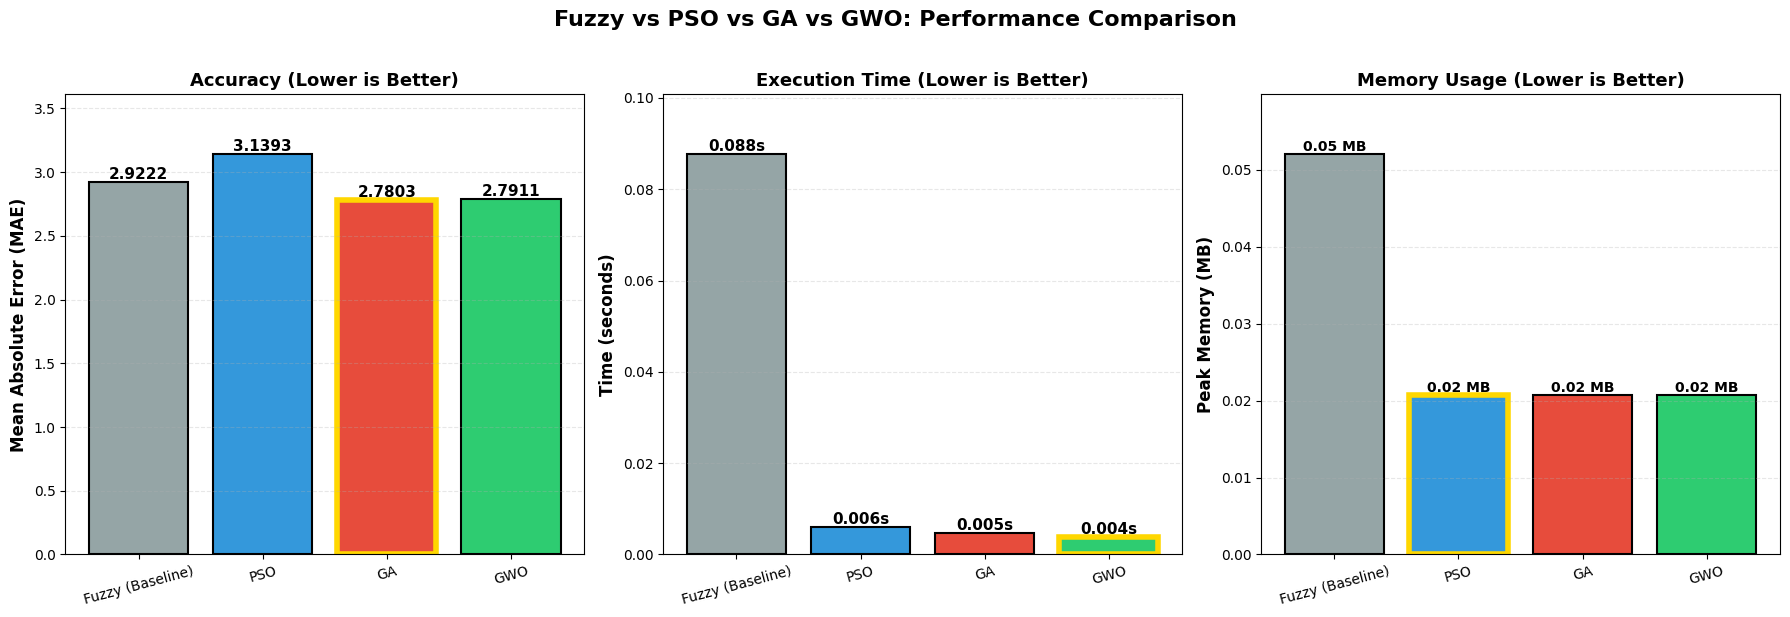

In [55]:
# VISUALIZATION 1: Performance Metrics Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Fuzzy vs PSO vs GA vs GWO: Performance Comparison', 
             fontsize=16, fontweight='bold', y=1.02)

methods = comparison_df['Method'].values
colors = ['#95a5a6', '#3498db', '#e74c3c', '#2ecc71']

# 1. Accuracy (MAE - lower is better)
ax1 = axes[0]
bars1 = ax1.bar(methods, comparison_df['MAE'], color=colors, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Mean Absolute Error (MAE)', fontsize=12, fontweight='bold')
ax1.set_title('Accuracy (Lower is Better)', fontsize=13, fontweight='bold')
ax1.set_ylim(0, max(comparison_df['MAE']) * 1.15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

best_mae_idx = comparison_df['MAE'].idxmin()
bars1[best_mae_idx].set_edgecolor('gold')
bars1[best_mae_idx].set_linewidth(4)

# 2. Execution Time (lower is better)
ax2 = axes[1]
bars2 = ax2.bar(methods, comparison_df['Time (s)'], color=colors, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
ax2.set_title('Execution Time (Lower is Better)', fontsize=13, fontweight='bold')
ax2.set_ylim(0, max(comparison_df['Time (s)']) * 1.15)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}s',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

best_time_idx = comparison_df['Time (s)'].idxmin()
bars2[best_time_idx].set_edgecolor('gold')
bars2[best_time_idx].set_linewidth(4)

# 3. Memory Usage (lower is better)
ax3 = axes[2]
bars3 = ax3.bar(methods, comparison_df['Memory (MB)'], color=colors, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Peak Memory (MB)', fontsize=12, fontweight='bold')
ax3.set_title('Memory Usage (Lower is Better)', fontsize=13, fontweight='bold')
ax3.set_ylim(0, max(comparison_df['Memory (MB)']) * 1.15)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f} MB',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

best_mem_idx = comparison_df['Memory (MB)'].idxmin()
bars3[best_mem_idx].set_edgecolor('gold')
bars3[best_mem_idx].set_linewidth(4)

for ax in axes:
    ax.tick_params(axis='x', rotation=15)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

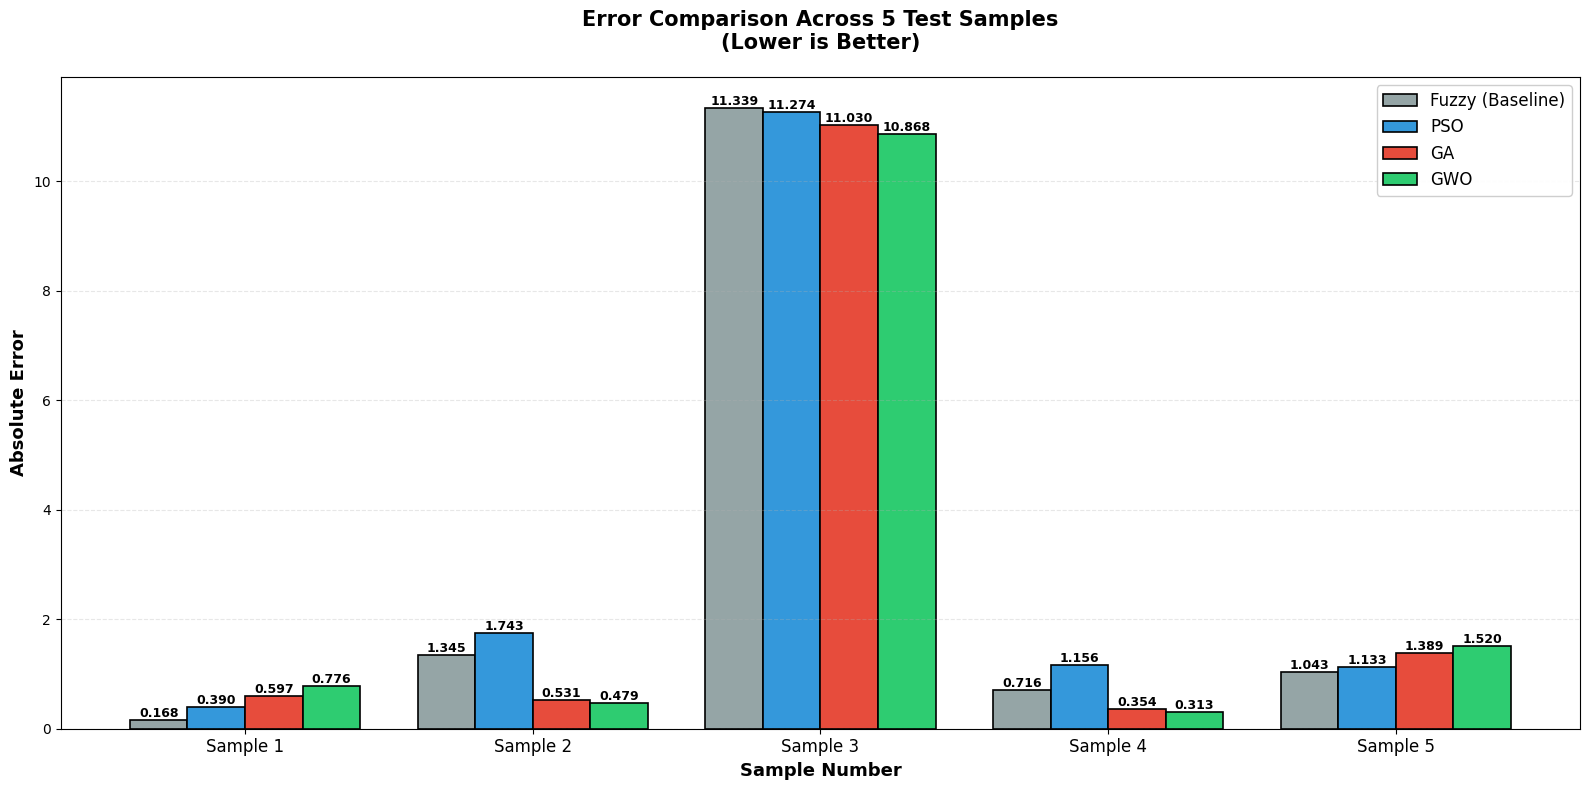

In [56]:
# VISUALIZATION 2: Sample-Level Error Comparison
fig, ax = plt.subplots(figsize=(16, 8))

sample_errors = comparison_df[[f'S{i+1}_Error' for i in range(5)]].values
x = np.arange(5)
width = 0.2

for i, (method, color) in enumerate(zip(methods, colors)):
    offset = (i - 1.5) * width
    bars = ax.bar(x + offset, sample_errors[i], width, label=method,
                   color=color, edgecolor='black', linewidth=1.2)
    
    for j, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_xlabel('Sample Number', fontsize=13, fontweight='bold')
ax.set_ylabel('Absolute Error', fontsize=13, fontweight='bold')
ax.set_title('Error Comparison Across 5 Test Samples\n(Lower is Better)', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels([f'Sample {i+1}' for i in range(5)], fontsize=12)
ax.legend(fontsize=12, loc='upper right', framealpha=0.95)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

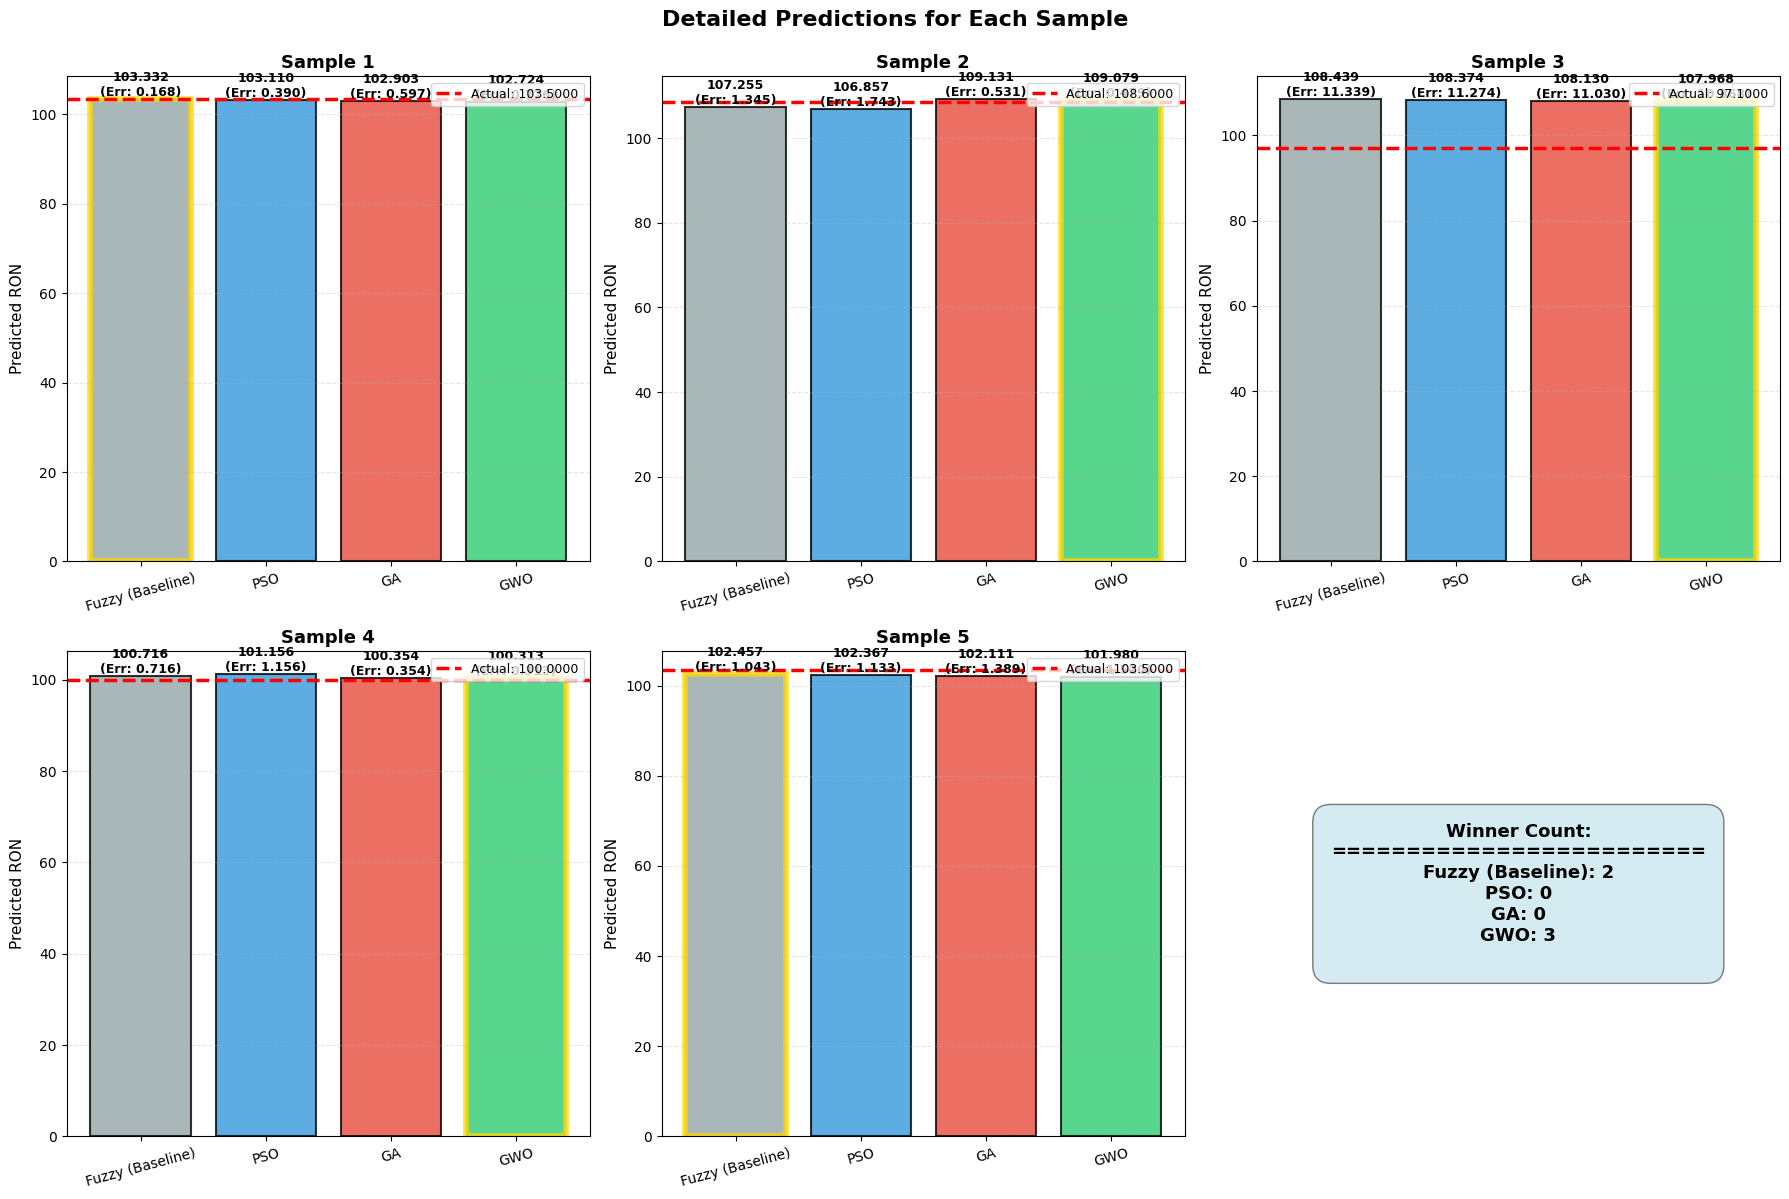

In [57]:
# VISUALIZATION 3: Detailed Sample Predictions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Detailed Predictions for Each Sample', fontsize=16, fontweight='bold', y=0.995)

for idx in range(5):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    actual_val = y_samples.iloc[idx]
    predictions = [
        pred_baseline[idx],
        pred_pso[idx],
        pred_ga[idx],
        pred_gwo[idx]
    ]
    errors = [
        err_baseline[idx],
        err_pso[idx],
        err_ga[idx],
        err_gwo[idx]
    ]
    
    # Bar plot
    bars = ax.bar(methods, predictions, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
    
    # Highlight best prediction (closest to actual)
    best_idx = np.argmin(errors)
    bars[best_idx].set_edgecolor('gold')
    bars[best_idx].set_linewidth(4)
    
    # Add actual value line
    ax.axhline(y=actual_val, color='red', linestyle='--', linewidth=2.5, label=f'Actual: {actual_val:.4f}')
    
    # Add value labels
    for bar, err in zip(bars, errors):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}\n(Err: {err:.3f})',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax.set_title(f'Sample {idx+1}', fontsize=13, fontweight='bold')
    ax.set_ylabel('Predicted RON', fontsize=11)
    ax.tick_params(axis='x', rotation=15)
    ax.legend(fontsize=9, loc='upper right')
    ax.grid(axis='y', alpha=0.3, linestyle='--')

# Remove last subplot (6th position for 5 samples)
axes[1, 2].axis('off')

# Add winner summary in the empty subplot
ax_summary = axes[1, 2]
ax_summary.axis('off')

# Count wins per method
wins = {'Fuzzy (Baseline)': 0, 'PSO': 0, 'GA': 0, 'GWO': 0}
for idx in range(5):
    errors = [err_baseline[idx], err_pso[idx], err_ga[idx], err_gwo[idx]]
    best_idx = np.argmin(errors)
    wins[methods[best_idx]] += 1

summary_text = "Winner Count:\n" + "="*25 + "\n"
for method, count in wins.items():
    summary_text += f"{method}: {count}\n"

ax_summary.text(0.5, 0.5, summary_text,
                ha='center', va='center',
                fontsize=13, fontweight='bold',
                bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.show()

# Parameter Tuning Experiments: PSO vs GA vs GWO

Eksperimen parameter optimization dengan berbagai konfigurasi untuk menemukan parameter terbaik

In [ ]:
# PSO with Patience and Parameter Variations
class PSOOptimizer:
    def __init__(self, n_particles=50, max_iter=100, c1=0.5, c2=0.5, w=0.7, patience=5):
        self.n_particles = n_particles
        self.max_iter = max_iter
        self.c1 = c1
        self.c2 = c2
        self.w = w
        self.patience = patience
        self.convergence_history = []
        self.early_stopped = False
        self.stopped_iteration = None
        
    def optimize(self, fis_model, X_train, y_train, initial_position=None):
        lower_bounds, upper_bounds = fis_model.get_param_bounds()
        dimension = len(lower_bounds)
        
        # Initialize particles
        positions = np.random.uniform(low=lower_bounds, high=upper_bounds,
                                     size=(self.n_particles, dimension))
        if initial_position is not None:
            positions[0] = initial_position.copy()
        
        velocities = np.zeros(shape=(self.n_particles, dimension))
        
        # Evaluate initial fitness
        def evaluate_fitness(param_vector):
            fis_model.set_params_from_vector(param_vector)
            y_pred = fis_model.predict(X_train)
            return mean_squared_error(y_train, y_pred)
        
        # Initialize pbest
        pbest_positions = positions.copy()
        pbest_scores = np.array([evaluate_fitness(positions[i]) for i in range(self.n_particles)])
        
        # Initialize gbest
        gbest_index = np.argmin(pbest_scores)
        gbest_position = pbest_positions[gbest_index].copy()
        gbest_score = pbest_scores[gbest_index]
        
        # Early stopping variables
        best_score_so_far = gbest_score
        no_improvement_count = 0
        
        for iteration in range(self.max_iter):
            # Update velocities and positions
            r1 = np.random.rand(self.n_particles, dimension)
            r2 = np.random.rand(self.n_particles, dimension)
            
            v_inertia = self.w * velocities
            v_cognitive = self.c1 * r1 * (pbest_positions - positions)
            gbest_matrix = np.tile(gbest_position, (self.n_particles, 1))
            v_social = self.c2 * r2 * (gbest_matrix - positions)
            
            velocities = v_inertia + v_cognitive + v_social
            positions = positions + velocities
            positions = np.clip(positions, lower_bounds, upper_bounds)
            
            # Evaluate fitness
            current_scores = np.array([evaluate_fitness(positions[i]) for i in range(self.n_particles)])
            
            # Update pbest
            improved_pbest = current_scores < pbest_scores
            pbest_scores[improved_pbest] = current_scores[improved_pbest]
            pbest_positions[improved_pbest] = positions[improved_pbest]
            
            # Update gbest
            min_current_score = np.min(current_scores)
            if min_current_score < gbest_score:
                gbest_score = min_current_score
                gbest_index = np.argmin(current_scores)
                gbest_position = positions[gbest_index].copy()
            
            self.convergence_history.append(gbest_score)
            
            # Early stopping check
            if gbest_score < best_score_so_far - 1e-6:
                best_score_so_far = gbest_score
                no_improvement_count = 0
            else:
                no_improvement_count += 1
            
            if no_improvement_count >= self.patience:
                self.early_stopped = True
                self.stopped_iteration = iteration + 1
                break
        
        if not self.early_stopped:
            self.stopped_iteration = self.max_iter
        
        return gbest_position, self.convergence_history

print("PSO Optimizer with Patience created successfully!")

PSO Optimizer with Patience created successfully!


In [ ]:
# GA with Patience and Parameter Variations
class GAOptimizer:
    def __init__(self, pop_size=50, max_gen=100, mutation_rate=0.1, cross_rate=0.7, patience=5):
        self.pop_size = pop_size
        self.max_gen = max_gen
        self.mutation_rate = mutation_rate
        self.cross_rate = cross_rate
        self.patience = patience
        self.convergence_history = []
        self.early_stopped = False
        self.stopped_iteration = None
        self.best_individual = None
        self.best_score = float('inf')
        
    def get_fitness(self, individual, fis_model, X, y):
        fis_model.set_params_from_vector(individual)
        y_pred = fis_model.predict(X)
        mse = mean_squared_error(y, y_pred)
        return mse
    
    def select(self, population, fitness):
        # Tournament selection
        tournament_size = 3
        selected = []
        for _ in range(self.pop_size):
            tournament_idx = np.random.choice(len(population), tournament_size, replace=False)
            tournament_fitness = [fitness[i] for i in tournament_idx]
            winner_idx = tournament_idx[np.argmin(tournament_fitness)]
            selected.append(population[winner_idx].copy())
        return np.array(selected)
    
    def crossover(self, parent1, parent2):
        if np.random.rand() < self.cross_rate:
            alpha = np.random.rand()
            child1 = alpha * parent1 + (1 - alpha) * parent2
            child2 = (1 - alpha) * parent1 + alpha * parent2
            return child1, child2
        return parent1.copy(), parent2.copy()
    
    def mutate(self, child):
        mutation_mask = np.random.rand(len(child)) < self.mutation_rate
        noise = np.random.normal(0, 0.1, size=np.sum(mutation_mask))
        child[mutation_mask] += noise
        return child
    
    def optimize(self, fis_model, X_train, y_train, initial_position=None):
        lower_bounds, upper_bounds = fis_model.get_param_bounds()
        dimension = len(lower_bounds)
        
        # Initialize population
        population = np.random.uniform(low=lower_bounds, high=upper_bounds,
                                      size=(self.pop_size, dimension))
        if initial_position is not None:
            population[0] = initial_position.copy()
        
        # Early stopping variables
        best_score_so_far = float('inf')
        no_improvement_count = 0
        
        for generation in range(self.max_gen):
            # Evaluate fitness
            fitness = np.array([self.get_fitness(population[i], fis_model, X_train, y_train) 
                               for i in range(self.pop_size)])
            
            # Update best
            min_fitness = np.min(fitness)
            if min_fitness < self.best_score:
                self.best_score = min_fitness
                self.best_individual = population[np.argmin(fitness)].copy()
            
            self.convergence_history.append(self.best_score)
            
            # Early stopping check
            if self.best_score < best_score_so_far - 1e-6:
                best_score_so_far = self.best_score
                no_improvement_count = 0
            else:
                no_improvement_count += 1
            
            if no_improvement_count >= self.patience:
                self.early_stopped = True
                self.stopped_iteration = generation + 1
                break
            
            # Selection
            selected_pop = self.select(population, fitness)
            
            # Crossover and Mutation
            new_pop = [self.best_individual.copy()]  # Elitism
            
            for i in range(0, self.pop_size - 1, 2):
                p1 = selected_pop[i]
                p2 = selected_pop[(i + 1) % len(selected_pop)]
                c1, c2 = self.crossover(p1, p2)
                new_pop.append(self.mutate(c1))
                if len(new_pop) < self.pop_size:
                    new_pop.append(self.mutate(c2))
            
            population = np.array(new_pop)
            population = np.clip(population, lower_bounds, upper_bounds)
        
        if not self.early_stopped:
            self.stopped_iteration = self.max_gen
        
        return self.best_individual, self.convergence_history

print("GA Optimizer with Patience created successfully!")

GA Optimizer with Patience created successfully!


In [72]:
# GWO with Patience - Matching PSO/GA Interface
class GreyWolfOptimizer:
    def __init__(self, n_wolves=30, max_iter=100, patience=5):
        self.n_wolves = n_wolves
        self.max_iter = max_iter
        self.patience = patience
        self.convergence_curve = []
        self.early_stopped = False
        self.stopped_iteration = 0
    
    def optimize(self, fis_model, X_train, y_train, initial_position=None):
        """
        Optimize FIS parameters using Grey Wolf Optimizer
        
        Args:
            fis_model: SugenoFIS instance
            X_train: Training features
            y_train: Training target
            initial_position: Optional initial parameter vector
        
        Returns:
            tuple: (best_params, convergence_history)
        """
        # Get bounds from FIS model
        lower_bounds, upper_bounds = fis_model.get_param_bounds()
        dim = len(lower_bounds)
        
        # Initialize wolves
        if initial_position is not None:
            wolves = np.random.uniform(lower_bounds, upper_bounds, (self.n_wolves, dim))
            wolves[0] = initial_position  # Best wolf starts at initial position
        else:
            wolves = np.random.uniform(lower_bounds, upper_bounds, (self.n_wolves, dim))
        
        # Evaluate initial population
        fitness = np.zeros(self.n_wolves)
        for i in range(self.n_wolves):
            fis_model.set_params_from_vector(wolves[i])
            predictions = fis_model.predict(X_train)
            fitness[i] = mean_squared_error(y_train, predictions)
        
        # Initialize alpha, beta, delta
        sorted_indices = np.argsort(fitness)
        alpha_pos = wolves[sorted_indices[0]].copy()
        alpha_score = fitness[sorted_indices[0]]
        beta_pos = wolves[sorted_indices[1]].copy()
        beta_score = fitness[sorted_indices[1]]
        delta_pos = wolves[sorted_indices[2]].copy()
        delta_score = fitness[sorted_indices[2]]
        
        self.convergence_curve = []
        best_score = alpha_score
        no_improvement_count = 0
        
        # Main loop
        for iteration in range(self.max_iter):
            a = 2 - iteration * (2 / self.max_iter)  # Linearly decreasing from 2 to 0
            
            # Update each wolf
            for i in range(self.n_wolves):
                for j in range(dim):
                    # Alpha
                    r1 = np.random.random()
                    r2 = np.random.random()
                    A1 = 2 * a * r1 - a
                    C1 = 2 * r2
                    D_alpha = abs(C1 * alpha_pos[j] - wolves[i, j])
                    X1 = alpha_pos[j] - A1 * D_alpha
                    
                    # Beta
                    r1 = np.random.random()
                    r2 = np.random.random()
                    A2 = 2 * a * r1 - a
                    C2 = 2 * r2
                    D_beta = abs(C2 * beta_pos[j] - wolves[i, j])
                    X2 = beta_pos[j] - A2 * D_beta
                    
                    # Delta
                    r1 = np.random.random()
                    r2 = np.random.random()
                    A3 = 2 * a * r1 - a
                    C3 = 2 * r2
                    D_delta = abs(C3 * delta_pos[j] - wolves[i, j])
                    X3 = delta_pos[j] - A3 * D_delta
                    
                    # Update position
                    wolves[i, j] = (X1 + X2 + X3) / 3
                
                # Clip to bounds
                wolves[i] = np.clip(wolves[i], lower_bounds, upper_bounds)
                
                # Evaluate fitness
                fis_model.set_params_from_vector(wolves[i])
                predictions = fis_model.predict(X_train)
                fitness[i] = mean_squared_error(y_train, predictions)
            
            # Update alpha, beta, delta
            sorted_indices = np.argsort(fitness)
            if fitness[sorted_indices[0]] < alpha_score:
                delta_pos = beta_pos.copy()
                delta_score = beta_score
                beta_pos = alpha_pos.copy()
                beta_score = alpha_score
                alpha_pos = wolves[sorted_indices[0]].copy()
                alpha_score = fitness[sorted_indices[0]]
            elif fitness[sorted_indices[0]] < beta_score:
                delta_pos = beta_pos.copy()
                delta_score = beta_score
                beta_pos = wolves[sorted_indices[0]].copy()
                beta_score = fitness[sorted_indices[0]]
            elif fitness[sorted_indices[0]] < delta_score:
                delta_pos = wolves[sorted_indices[0]].copy()
                delta_score = fitness[sorted_indices[0]]
            
            self.convergence_curve.append(alpha_score)
            
            # Check for early stopping
            if alpha_score < best_score * 0.9999:  # Improvement threshold
                best_score = alpha_score
                no_improvement_count = 0
            else:
                no_improvement_count += 1
            
            if no_improvement_count >= self.patience:
                self.early_stopped = True
                self.stopped_iteration = iteration + 1
                break
        
        if not self.early_stopped:
            self.stopped_iteration = self.max_iter
        
        return alpha_pos, self.convergence_curve

print("GWO Optimizer with Patience created successfully!")

GWO Optimizer with Patience created successfully!


In [60]:
# Define parameter configurations to test
param_configs = {
    'PSO': [
        {'name': 'PSO-1', 'n_particles': 30, 'max_iter': 50, 'c1': 0.5, 'c2': 0.5, 'w': 0.7, 'patience': 5},
        {'name': 'PSO-2', 'n_particles': 50, 'max_iter': 50, 'c1': 1.0, 'c2': 1.0, 'w': 0.5, 'patience': 5},
        {'name': 'PSO-3', 'n_particles': 70, 'max_iter': 50, 'c1': 1.5, 'c2': 1.5, 'w': 0.3, 'patience': 5},
    ],
    'GA': [
        {'name': 'GA-1', 'pop_size': 30, 'max_gen': 50, 'mutation_rate': 0.1, 'cross_rate': 0.7, 'patience': 5},
        {'name': 'GA-2', 'pop_size': 50, 'max_gen': 50, 'mutation_rate': 0.15, 'cross_rate': 0.8, 'patience': 5},
        {'name': 'GA-3', 'pop_size': 70, 'max_gen': 50, 'mutation_rate': 0.2, 'cross_rate': 0.9, 'patience': 5},
    ],
    'GWO': [
        {'name': 'GWO-1', 'n_wolves': 30, 'max_iter': 50, 'patience': 5},
        {'name': 'GWO-2', 'n_wolves': 50, 'max_iter': 50, 'patience': 5},
        {'name': 'GWO-3', 'n_wolves': 70, 'max_iter': 50, 'patience': 5},
    ]
}

print("Parameter configurations defined:")
print("="*80)
for method, configs in param_configs.items():
    print(f"\n{method}:")
    for config in configs:
        print(f"  {config['name']}: {config}")

Parameter configurations defined:

PSO:
  PSO-1: {'name': 'PSO-1', 'n_particles': 30, 'max_iter': 50, 'c1': 0.5, 'c2': 0.5, 'w': 0.7, 'patience': 5}
  PSO-2: {'name': 'PSO-2', 'n_particles': 50, 'max_iter': 50, 'c1': 1.0, 'c2': 1.0, 'w': 0.5, 'patience': 5}
  PSO-3: {'name': 'PSO-3', 'n_particles': 70, 'max_iter': 50, 'c1': 1.5, 'c2': 1.5, 'w': 0.3, 'patience': 5}

GA:
  GA-1: {'name': 'GA-1', 'pop_size': 30, 'max_gen': 50, 'mutation_rate': 0.1, 'cross_rate': 0.7, 'patience': 5}
  GA-2: {'name': 'GA-2', 'pop_size': 50, 'max_gen': 50, 'mutation_rate': 0.15, 'cross_rate': 0.8, 'patience': 5}
  GA-3: {'name': 'GA-3', 'pop_size': 70, 'max_gen': 50, 'mutation_rate': 0.2, 'cross_rate': 0.9, 'patience': 5}

GWO:
  GWO-1: {'name': 'GWO-1', 'n_wolves': 30, 'max_iter': 50, 'patience': 5}
  GWO-2: {'name': 'GWO-2', 'n_wolves': 50, 'max_iter': 50, 'patience': 5}
  GWO-3: {'name': 'GWO-3', 'n_wolves': 70, 'max_iter': 50, 'patience': 5}


In [73]:
# Run parameter tuning experiments for all methods
experiment_results = []

print("="*100)
print("RUNNING PARAMETER TUNING EXPERIMENTS")
print("="*100)

# Run PSO experiments
for config in param_configs['PSO']:
    print(f"\n{'='*80}")
    print(f"Testing: {config['name']}")
    print(f"Parameters: n_particles={config['n_particles']}, max_iter={config['max_iter']}, "
          f"c1={config['c1']}, c2={config['c2']}, w={config['w']}")
    print(f"{'='*80}")
    
    fis_temp = SugenoFIS(n_rules=N_RULES, n_features=TOP_K)
    fis_temp.initialize_params_clustering(X_train_sel, y_train)
    initial_params = fis_temp.get_params_as_vector()
    
    pso = PSOOptimizer(
        n_particles=config['n_particles'],
        max_iter=config['max_iter'],
        c1=config['c1'],
        c2=config['c2'],
        w=config['w'],
        patience=config['patience']
    )
    
    best_params, convergence = pso.optimize(fis_temp, X_train_sel, y_train, initial_params)
    
    # Evaluate on all sets
    fis_temp.set_params_from_vector(best_params)
    
    train_pred = fis_temp.predict(X_train_sel)
    val_pred = fis_temp.predict(X_val_sel)
    test_pred = fis_temp.predict(X_test_sel)
    
    train_mse = mean_squared_error(y_train, train_pred)
    val_mse = mean_squared_error(y_val, val_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_r2 = r2_score(y_train, train_pred)
    val_r2 = r2_score(y_val, val_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    early_msg = f"Yes (iter {pso.stopped_iteration})" if pso.early_stopped else "No"
    
    experiment_results.append({
        'Method': 'PSO',
        'Config': config['name'],
        'Train_MSE': train_mse,
        'Val_MSE': val_mse,
        'Test_MSE': test_mse,
        'Train_R2': train_r2,
        'Val_R2': val_r2,
        'Test_R2': test_r2,
        'Best_Params': best_params,
        'Convergence': convergence,
        'Early_Stopped': pso.early_stopped,
        'Stopped_Iter': pso.stopped_iteration,
        'Population': config['n_particles']
    })
    
    print(f"Train MSE: {train_mse:.6f}, Val MSE: {val_mse:.6f}, Test MSE: {test_mse:.6f}")
    print(f"Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}, Test R²: {test_r2:.4f}")
    print(f"Early Stopped: {early_msg}")

# Run GA experiments
for config in param_configs['GA']:
    print(f"\n{'='*80}")
    print(f"Testing: {config['name']}")
    print(f"Parameters: pop_size={config['pop_size']}, max_gen={config['max_gen']}, "
          f"mutation_rate={config['mutation_rate']}, cross_rate={config['cross_rate']}")
    print(f"{'='*80}")
    
    fis_temp = SugenoFIS(n_rules=N_RULES, n_features=TOP_K)
    fis_temp.initialize_params_clustering(X_train_sel, y_train)
    initial_params = fis_temp.get_params_as_vector()
    
    ga = GAOptimizer(
        pop_size=config['pop_size'],
        max_gen=config['max_gen'],
        mutation_rate=config['mutation_rate'],
        cross_rate=config['cross_rate'],
        patience=config['patience']
    )
    
    best_params, convergence = ga.optimize(fis_temp, X_train_sel, y_train, initial_params)
    
    # Evaluate on all sets
    fis_temp.set_params_from_vector(best_params)
    
    train_pred = fis_temp.predict(X_train_sel)
    val_pred = fis_temp.predict(X_val_sel)
    test_pred = fis_temp.predict(X_test_sel)
    
    train_mse = mean_squared_error(y_train, train_pred)
    val_mse = mean_squared_error(y_val, val_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_r2 = r2_score(y_train, train_pred)
    val_r2 = r2_score(y_val, val_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    early_msg = f"Yes (gen {ga.stopped_iteration})" if ga.early_stopped else "No"
    
    experiment_results.append({
        'Method': 'GA',
        'Config': config['name'],
        'Train_MSE': train_mse,
        'Val_MSE': val_mse,
        'Test_MSE': test_mse,
        'Train_R2': train_r2,
        'Val_R2': val_r2,
        'Test_R2': test_r2,
        'Best_Params': best_params,
        'Convergence': convergence,
        'Early_Stopped': ga.early_stopped,
        'Stopped_Iter': ga.stopped_iteration,
        'Population': config['pop_size']
    })
    
    print(f"Train MSE: {train_mse:.6f}, Val MSE: {val_mse:.6f}, Test MSE: {test_mse:.6f}")
    print(f"Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}, Test R²: {test_r2:.4f}")
    print(f"Early Stopped: {early_msg}")

# Run GWO experiments
for config in param_configs['GWO']:
    print(f"\n{'='*80}")
    print(f"Testing: {config['name']}")
    print(f"Parameters: n_wolves={config['n_wolves']}, max_iter={config['max_iter']}")
    print(f"{'='*80}")
    
    fis_temp = SugenoFIS(n_rules=N_RULES, n_features=TOP_K)
    fis_temp.initialize_params_clustering(X_train_sel, y_train)
    initial_params = fis_temp.get_params_as_vector()
    
    gwo = GreyWolfOptimizer(
        n_wolves=config['n_wolves'],
        max_iter=config['max_iter'],
        patience=config['patience']
    )
    
    best_params, convergence = gwo.optimize(fis_temp, X_train_sel, y_train, initial_params)
    
    # Evaluate on all sets
    fis_temp.set_params_from_vector(best_params)
    
    train_pred = fis_temp.predict(X_train_sel)
    val_pred = fis_temp.predict(X_val_sel)
    test_pred = fis_temp.predict(X_test_sel)
    
    train_mse = mean_squared_error(y_train, train_pred)
    val_mse = mean_squared_error(y_val, val_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_r2 = r2_score(y_train, train_pred)
    val_r2 = r2_score(y_val, val_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    early_msg = f"Yes (iter {gwo.stopped_iteration})" if gwo.early_stopped else "No"
    
    experiment_results.append({
        'Method': 'GWO',
        'Config': config['name'],
        'Train_MSE': train_mse,
        'Val_MSE': val_mse,
        'Test_MSE': test_mse,
        'Train_R2': train_r2,
        'Val_R2': val_r2,
        'Test_R2': test_r2,
        'Best_Params': best_params,
        'Convergence': convergence,
        'Early_Stopped': gwo.early_stopped,
        'Stopped_Iter': gwo.stopped_iteration,
        'Population': config['n_wolves']
    })
    
    print(f"Train MSE: {train_mse:.6f}, Val MSE: {val_mse:.6f}, Test MSE: {test_mse:.6f}")
    print(f"Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}, Test R²: {test_r2:.4f}")
    print(f"Early Stopped: {early_msg}")

print("\n" + "="*100)
print("ALL EXPERIMENTS COMPLETED")
print("="*100)

RUNNING PARAMETER TUNING EXPERIMENTS

Testing: PSO-1
Parameters: n_particles=30, max_iter=50, c1=0.5, c2=0.5, w=0.7
FIS initialized: 5 rules
Premise params: (5, 10, 2)
Consequent params: (5, 11)
Train MSE: 7.426066, Val MSE: 99.093283, Test MSE: 7.603346
Train R²: 0.9834, Val R²: 0.8399, Test R²: 0.9783
Early Stopped: Yes (iter 5)

Testing: PSO-2
Parameters: n_particles=50, max_iter=50, c1=1.0, c2=1.0, w=0.5
FIS initialized: 5 rules
Premise params: (5, 10, 2)
Consequent params: (5, 11)
Train MSE: 7.426066, Val MSE: 99.093283, Test MSE: 7.603346
Train R²: 0.9834, Val R²: 0.8399, Test R²: 0.9783
Early Stopped: Yes (iter 5)

Testing: PSO-2
Parameters: n_particles=50, max_iter=50, c1=1.0, c2=1.0, w=0.5
FIS initialized: 5 rules
Premise params: (5, 10, 2)
Consequent params: (5, 11)
Train MSE: 7.426066, Val MSE: 99.093283, Test MSE: 7.603346
Train R²: 0.9834, Val R²: 0.8399, Test R²: 0.9783
Early Stopped: Yes (iter 5)

Testing: PSO-3
Parameters: n_particles=70, max_iter=50, c1=1.5, c2=1.5, w=